#1. Using All Features

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

,Nr,Sex,Age,Fatigue,General weakness,Pain,Focal symptoms,Cranial Nerve Symptoms,CN3,CN4,...,Pathological CSF,Increased protein,Increased protein (g/l),Pleocytosis,Pleocytosis (cells/ml),OGB + in CSF,IgG levels in CSF,VEP +,BAEP +,MS
0,2,0,56,0,0,0,1,1,0,0,...,1,0,0.37,0,4,0,,0,0,0
1,3,0,47,0,0,1,1,0,0,0,...,0,0,0.28,0,0,0,22.9,0,1,0
2,4,0,43,0,0,1,1,1,0,0,...,0,0,0.38,0,2,,25.3,1,0,0
3,5,0,39,0,0,1,0,0,0,0,...,0,,,0,1,0,,,,0
4,6,0,61,0,0,1,1,0,0,0,...,1,1,0.57,0,0,1,,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,165,0,65,0,0,0,1,0,0,0,...,,,NaN,,NaN,,,1,0,0
134,166,1,61,0,0,0,0,1,1,0,...,1,1,0.96,1,6,0,117,,,0
135,167,0,28,0,1,1,0,0,0,0,...,0,0,0.23,0,4,,,0,,1
136,169,0,22,0,0,0,1,0,0,0,...,0,0,0.16,0,4,1,14.9,0,0,1


In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(138, 44)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Increased protein (g/l)', 'Pleocytosis (cells/ml)', 'Sum of symptoms'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                           int64
Age                                           int64
Fatigue                                       int64
General weakness                              int64
Pain                                          int64
Focal symptoms                                int64
Cranial Nerve Symptoms                        int64
CN3                                           int64
CN4                                           int64
CN5                                           int64
CN6                                           int64
CN8                                           int64
Pathological reflexes                         int64
Babinski's                                    int64
Rossolimo                                     int64
Muscle strength                               int64
Reflex asymmetry                              int64
Muscle tone abnormalities                     int64
Proprioception                              float64
Superficial 

Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

Correlation Matrix


,Sex,Age,Fatigue,General weakness,Pain,Focal symptoms,Cranial Nerve Symptoms,CN3,CN4,CN5,...,Juxtacortical,MRI spinal lesions,Pathological CSF,Increased protein,Pleocytosis,OGB + in CSF,IgG levels in CSF,VEP +,BAEP +,MS
Sex,1.000000e+00,0.016061,-0.124726,-0.186682,-0.143824,0.013304,0.113312,0.091287,0.116754,0.153485,...,-0.124258,0.117442,0.256159,0.278291,0.166620,-0.063964,0.117360,-0.043531,-0.011385,0.149906
Age,1.606093e-02,1.000000,-0.018888,0.040808,0.069197,0.132232,0.028693,0.071353,-0.013823,0.148812,...,0.194098,-0.224160,0.043598,0.308322,0.055476,-0.115866,0.246406,0.229738,0.134672,-0.068102
Fatigue,-1.247262e-01,-0.018888,1.000000,0.239192,0.033463,0.061810,0.028266,-0.079701,-0.086645,0.095718,...,0.254364,-0.241124,-0.029798,-0.111382,-0.068132,-0.039067,-0.030295,0.031995,0.044666,-0.093820
General weakness,-1.866822e-01,0.040808,0.239192,1.000000,0.084867,-0.091215,-0.034265,-0.130136,-0.077672,0.019350,...,0.172669,-0.204313,-0.002075,0.061167,-0.045524,0.022591,-0.085118,-0.204259,0.027302,0.001454
Pain,-1.438243e-01,0.069197,0.033463,0.084867,1.000000,-0.008537,-0.021425,-0.074736,-0.155520,0.167866,...,0.062533,-0.139975,-0.040157,0.134558,-0.038100,-0.025400,0.072157,-0.005035,-0.178989,-0.139549
Focal symptoms,1.330380e-02,0.132232,0.061810,-0.091215,-0.008537,1.000000,0.218173,0.014574,0.108729,0.036171,...,-0.133988,0.101753,0.037959,0.019003,0.011279,0.087697,-0.040427,0.220444,0.203431,0.073790
Cranial Nerve Symptoms,1.133118e-01,0.028693,0.028266,-0.034265,-0.021425,0.218173,1.000000,0.349812,0.208787,0.224059,...,0.086896,-0.109319,0.067680,0.061416,0.172958,-0.024822,-0.170976,0.137961,0.049238,0.061327
CN3,9.128709e-02,0.071353,-0.079701,-0.130136,-0.074736,0.014574,0.349812,1.000000,0.596853,-0.096077,...,0.126301,0.061742,-0.056823,0.095822,0.011825,0.038583,0.016986,0.003610,-0.010968,0.072332
CN4,1.167536e-01,-0.013823,-0.086645,-0.077672,-0.155520,0.108729,0.208787,0.596853,1.000000,-0.057344,...,0.013543,0.088680,-0.225631,-0.003715,-0.129000,-0.162587,-0.149552,-0.077386,0.057650,-0.102512
CN5,1.534852e-01,0.148812,0.095718,0.019350,0.167866,0.036171,0.224059,-0.096077,-0.057344,1.000000,...,-0.035239,0.125520,0.079393,0.082367,0.093909,-0.009715,-0.065336,0.016948,-0.030433,0.075129


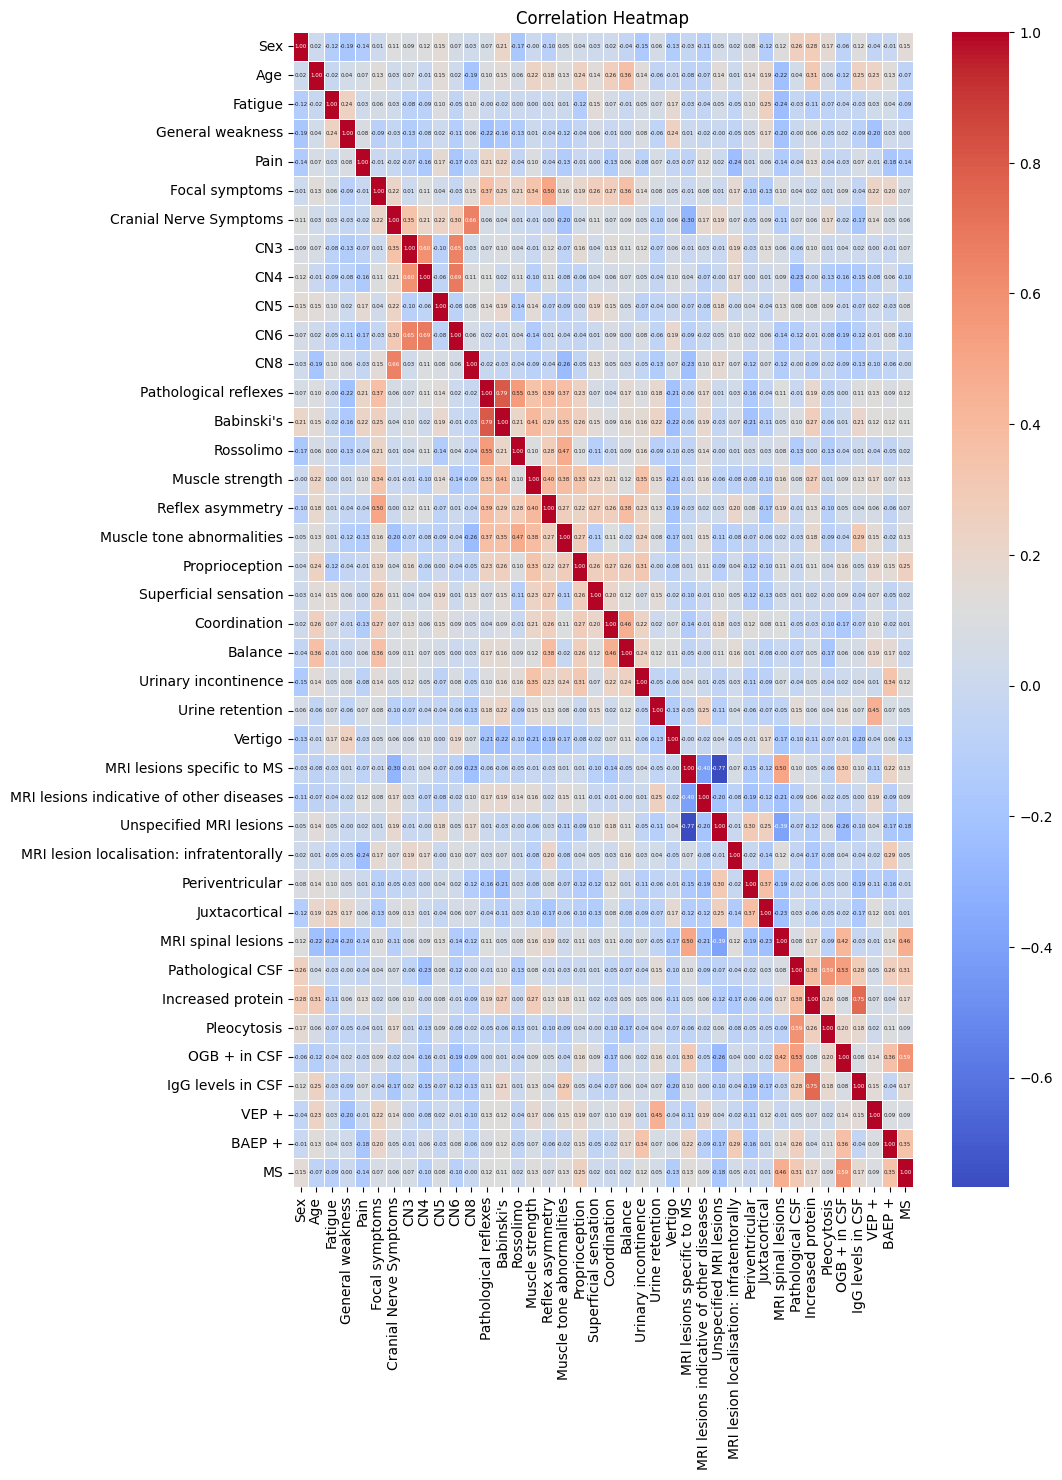

In [ ]:
#Visualise correlation as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(138, 39)
(138,)


Checking for imbalanced classes in the dataset

0.0    64.492754
1.0    35.507246
Name: MS, dtype: float64


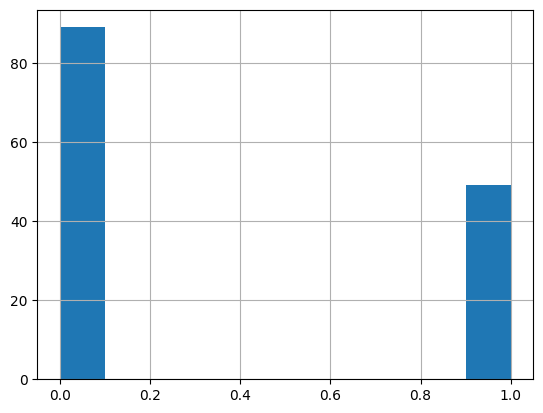

The baseline accuracy is: 0.644927536231884


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (110, 39)
x_test: (28, 39)
y_train: (110,)
y_test: (28,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8967320261437909


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8411764705882353


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8392156862745098


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8300653594771242


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8065359477124183


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.68169935 0.7496732  0.69346405 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.7293204399341161
Standard Deviation of Train F1 Score: 0.11840644417433385
Average Validation F1 Score: 0.5796685340802987
Standard Deviation of Validation F1 Score: 0.22861210775518492


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.73      0.87      0.79        71
         1.0       0.64      0.41      0.50        39

    accuracy                           0.71       110
   macro avg       0.68      0.64      0.65       110
weighted avg       0.70      0.71      0.69       110


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59        18
         1.0       0.33      0.40      0.36        10

    accuracy                           0.50        28
   macro avg       0.48      0.48      0.48        28
weighted avg       0.52      0.50      0.51        28



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

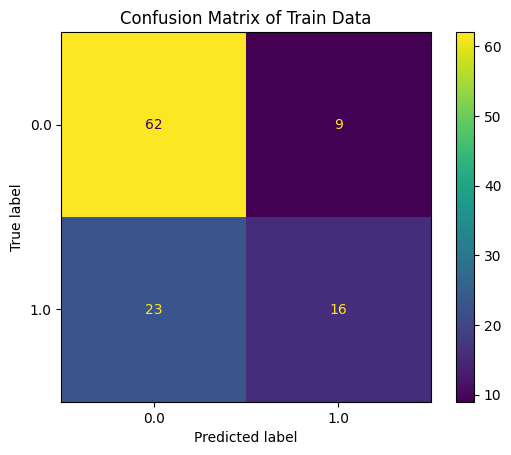

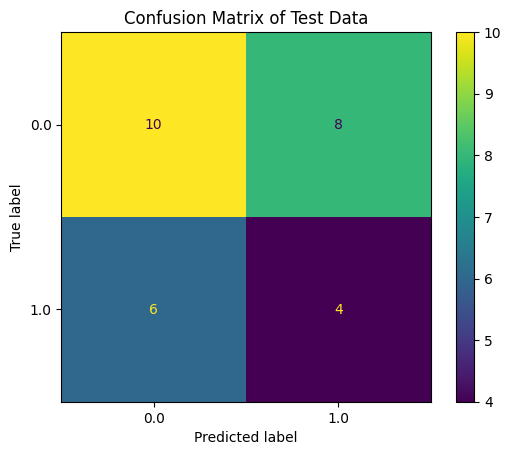

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

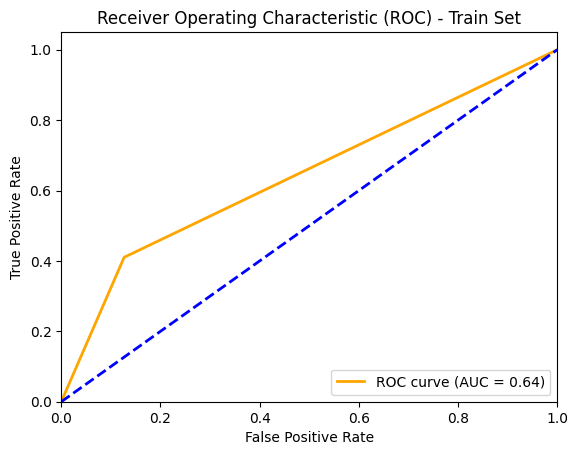

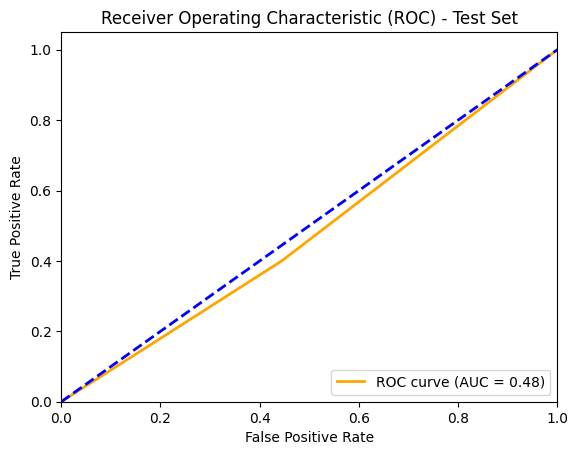

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.24918
Age: 0.00000
Fatigue: 0.00000
General weakness: 0.00000
Pain: 0.00000
Focal symptoms: 0.00000
Cranial Nerve Symptoms: 0.00000
CN3: 0.00000
CN4: 0.00000
CN5: 0.00000
CN6: 0.00000
CN8: 0.00000
Pathological reflexes: 0.00000
Babinski's: 0.00000
Rossolimo: 0.00000
Muscle strength: 0.00000
Reflex asymmetry: 0.00000
Muscle tone abnormalities: 0.00000
Proprioception: 0.00000
Superficial sensation: 0.00000
Coordination: 0.00000
Balance: 0.00000
Urinary incontinence: 0.00000
Urine retention: 0.00000
Vertigo: 0.00000
MRI lesions specific to MS: 0.00000
MRI lesions indicative of other diseases: 0.00000
Unspecified MRI lesions: 0.00000
MRI infratentorial lesions: 0.00000
Periventricular: 0.09551
Juxtacortical: 0.00000
MRI spinal lesions: 0.00000
Pathological CSF: 0.00000
Increased protein: 0.00000
Pleocytosis: 0.00000
OCB + in CSF: 0.65531
IgG levels in CSF: 0.00000
VEP +: 0.00000
BAEP +: 0.00000


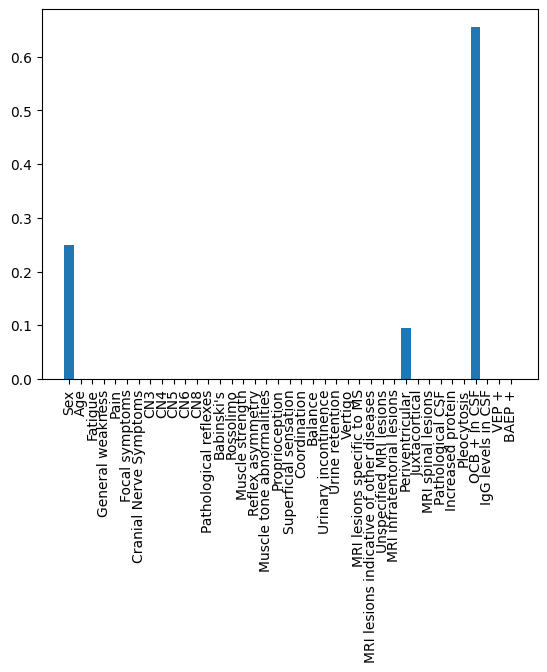

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#2. Using All Except Multicollinear Features

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Increased protein (g/l)', 'Pleocytosis (cells/ml)', 'Sum of symptoms'], axis=1)

Drop features with multicollinearity that also have a low correlation with target variable

In [ ]:
columns_to_drop = ["Babinski's", "Unspecified MRI lesions", "Increased protein"]
df.drop(columns=columns_to_drop, inplace=True)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                           int64
Age                                           int64
Fatigue                                       int64
General weakness                              int64
Pain                                          int64
Focal symptoms                                int64
Cranial Nerve Symptoms                        int64
CN3                                           int64
CN4                                           int64
CN5                                           int64
CN6                                           int64
CN8                                           int64
Pathological reflexes                         int64
Rossolimo                                     int64
Muscle strength                               int64
Reflex asymmetry                              int64
Muscle tone abnormalities                     int64
Proprioception                              float64
Superficial sensation                       float64
Coordination

Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

In [ ]:
#Visualise correlation as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

NameError: ignored

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(138, 36)
(138,)


Checking for imbalanced classes in the dataset

In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (110, 36)
x_test: (28, 36)
y_train: (110,)
y_test: (28,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8732026143790849


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8522875816993464


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
F1 Score: 0.8294117647058824


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8294117647058823


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8058823529411765


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.69411765 0.68104575 0.65947712 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.7277722480018817
Standard Deviation of Train F1 Score: 0.10051525401665322
Average Validation F1 Score: 0.662843137254902
Standard Deviation of Validation F1 Score: 0.18522106662505325


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        71
         1.0       0.78      0.64      0.70        39

    accuracy                           0.81       110
   macro avg       0.80      0.77      0.78       110
weighted avg       0.81      0.81      0.80       110


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        18
         1.0       0.73      0.80      0.76        10

    accuracy                           0.82        28
   macro avg       0.80      0.82      0.81        28
weighted avg       0.83      0.82      0.82        28



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

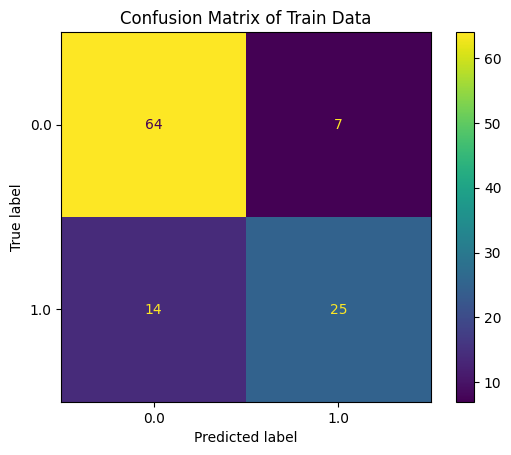

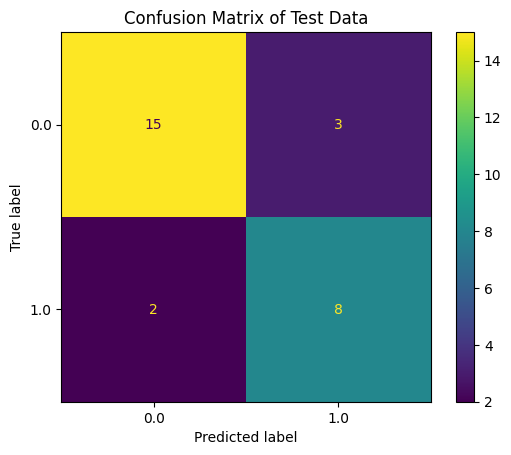

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

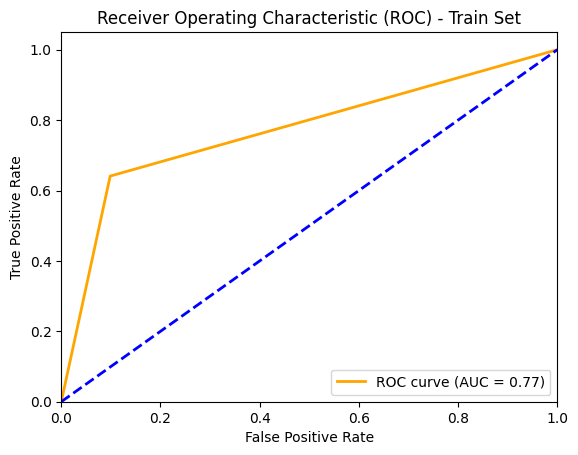

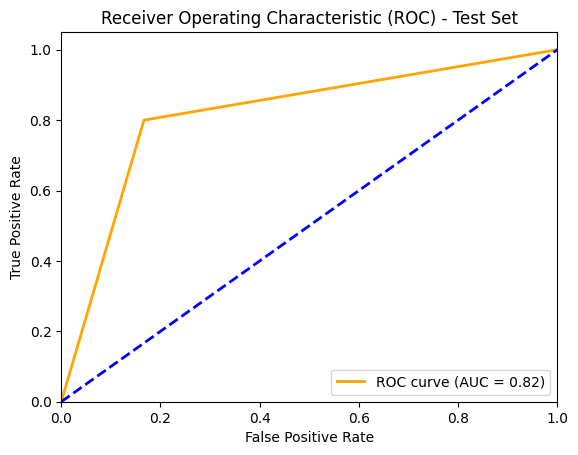

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.00000
Age: 0.00000
Fatigue: 0.00000
General weakness: 0.00000
Pain: 0.00000
Focal symptoms: 0.00000
Cranial Nerve Symptoms: 0.00000
CN3: 0.00000
CN4: 0.00000
CN5: 0.00000
CN6: 0.00000
CN8: 0.00000
Pathological reflexes: 0.00000
Rossolimo: 0.00000
Muscle strength: 0.00000
Reflex asymmetry: 0.00000
Muscle tone abnormalities: 0.00000
Proprioception: 0.00000
Superficial sensation: 0.00000
Coordination: 0.00000
Balance: 0.00000
Urinary incontinence: 0.00000
Urine retention: 0.00000
Vertigo: 0.00000
MRI lesions specific to MS: 0.00000
MRI lesions indicative of other diseases: 0.00000
MRI infratentorial lesions: 0.00000
Periventricular: 0.00000
Juxtacortical: 0.00000
MRI spinal lesions: 0.00000
Pathological CSF: 0.00000
Pleocytosis: 0.00000
OCB + in CSF: 1.00000
IgG levels in CSF: 0.00000
VEP +: 0.00000
BAEP +: 0.00000


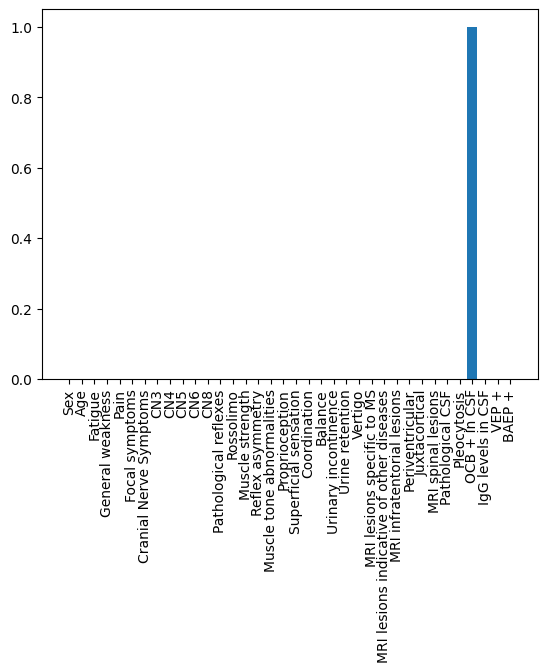

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#3.Using only important features from feature selection

##Data Loading

In [1]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

Dropping columns not needed for the analysis

In [3]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Increased protein (g/l)', 'Pleocytosis (cells/ml)', 'Sum of symptoms'], axis=1)

Converting the data type for use by the model

In [4]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                           int64
Age                                           int64
Fatigue                                       int64
General weakness                              int64
Pain                                          int64
Focal symptoms                                int64
Cranial Nerve Symptoms                        int64
CN3                                           int64
CN4                                           int64
CN5                                           int64
CN6                                           int64
CN8                                           int64
Pathological reflexes                         int64
Babinski's                                    int64
Rossolimo                                     int64
Muscle strength                               int64
Reflex asymmetry                              int64
Muscle tone abnormalities                     int64
Proprioception                              float64
Superficial 

Impute missing data

In [6]:
#Install library for imputation
!pip install impyute

In [7]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [8]:
#Specify x and y
x = imputed_df[['OCB + in CSF', 'Sex', 'Periventricular']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(138, 3)
(138,)


Visualising Relationship between Target Variable and Each Feature in X

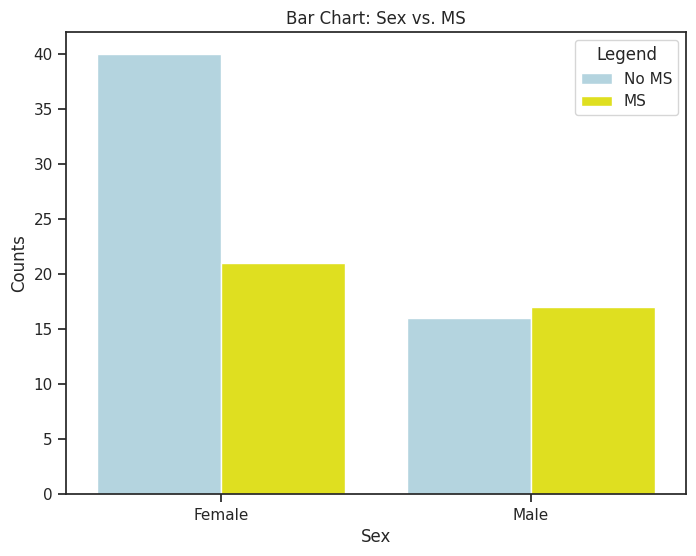

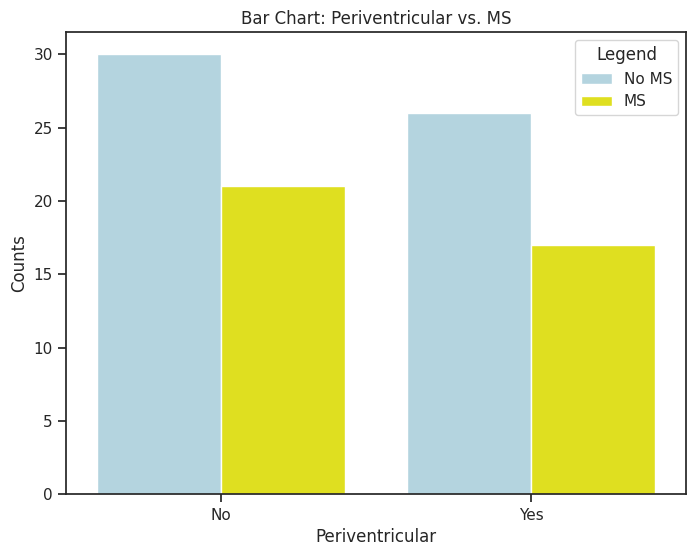

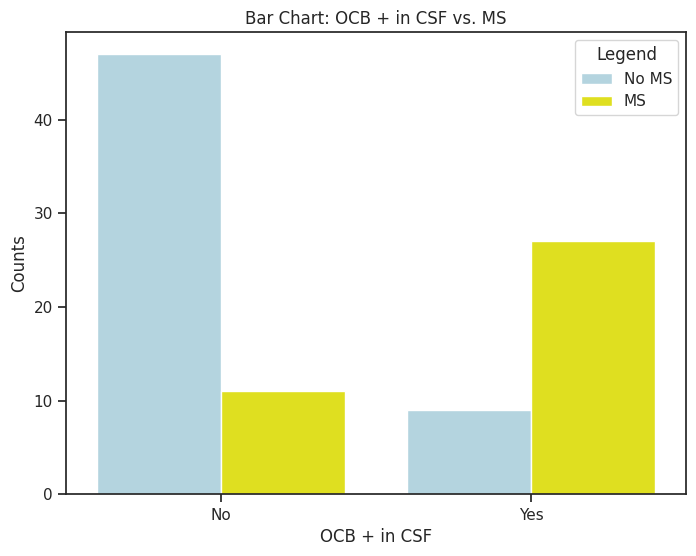

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["lightblue", "yellow"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df.copy()
filtered_df['Sex'] = filtered_df['Sex'].apply(convert_to_binary)
filtered_df['Periventricular'] = filtered_df['Periventricular'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)


# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['Sex', 'Periventricular', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    if variable == 'Sex':
        ax.set_xticklabels(["Female", "Male"])
    else:
        ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()




Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

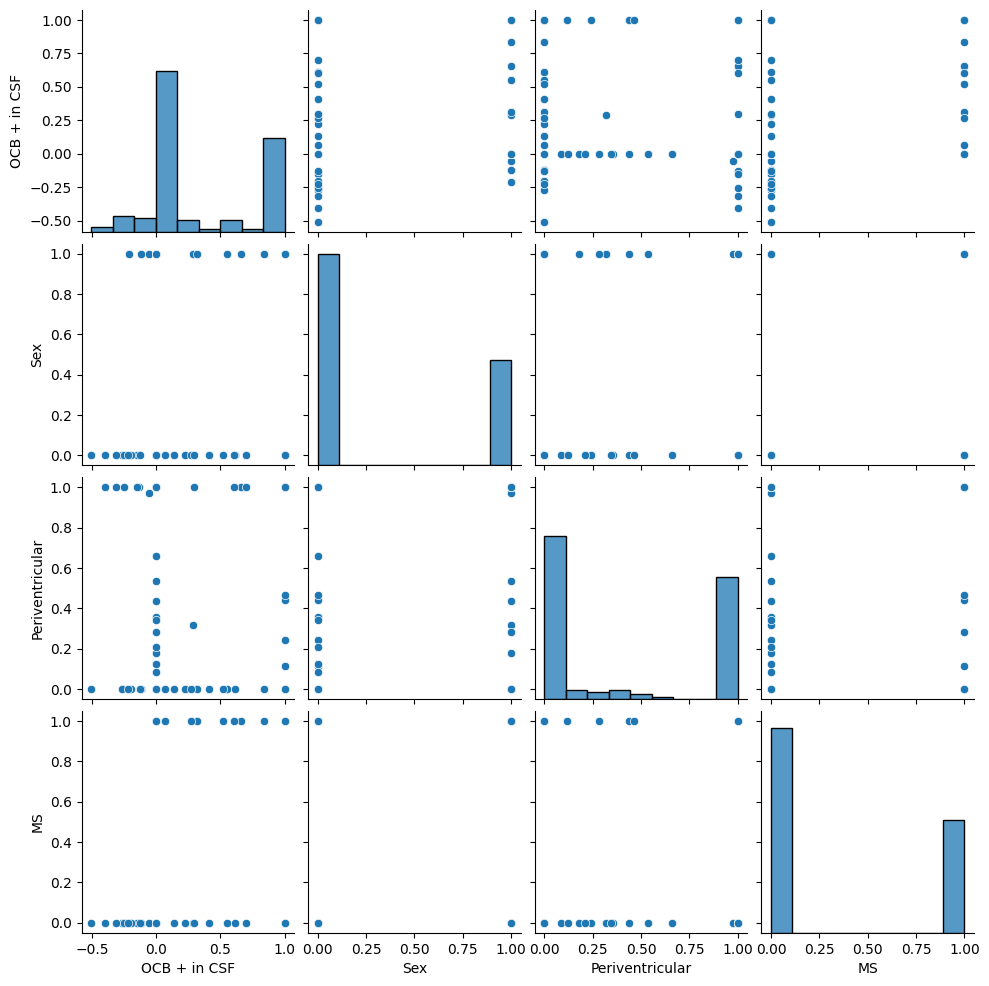

In [9]:
# Import libraries
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, palette=color)


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Checking for imbalanced classes in the dataset

In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (110, 3)
x_test: (28, 3)
y_train: (110,)
y_test: (28,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8738562091503269


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8411764705882353


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8176470588235294


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8058823529411765


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8065359477124183


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.67058824 0.64836601 0.67058824 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.5807933738049009
Standard Deviation of Train F1 Score: 0.2914497163761867
Average Validation F1 Score: 0.5211764705882352
Standard Deviation of Validation F1 Score: 0.296322195459136


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        71
         1.0       0.76      0.67      0.71        39

    accuracy                           0.81       110
   macro avg       0.80      0.78      0.78       110
weighted avg       0.81      0.81      0.81       110


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        18
         1.0       0.70      0.70      0.70        10

    accuracy                           0.79        28
   macro avg       0.77      0.77      0.77        28
weighted avg       0.79      0.79      0.79        28



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

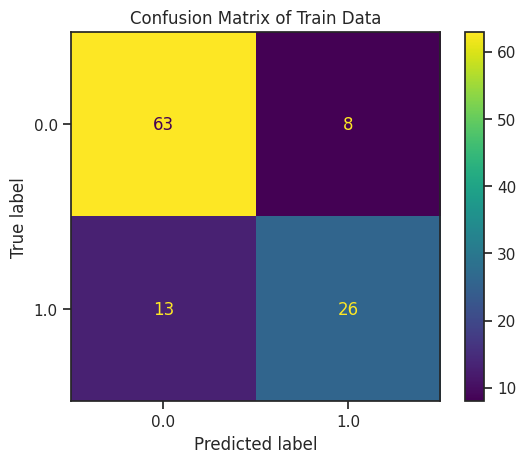

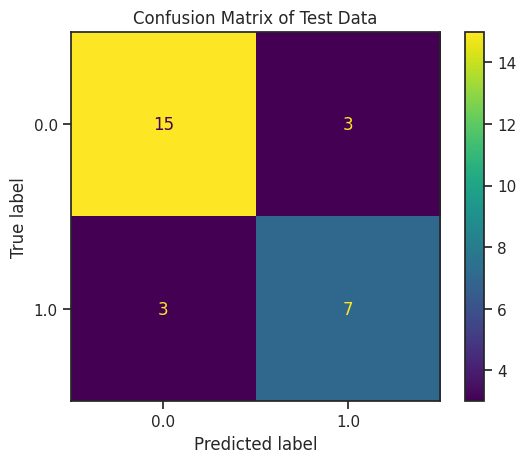

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

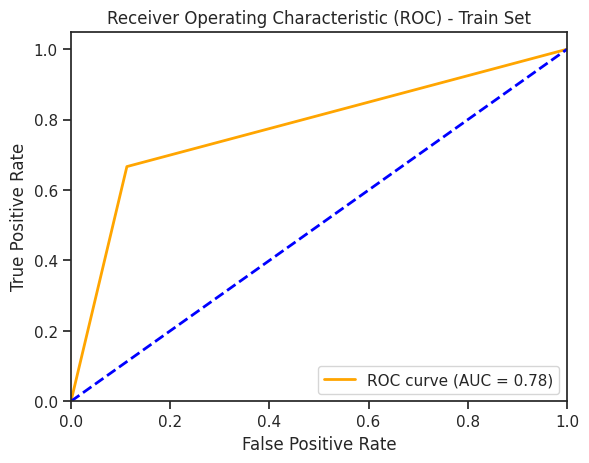

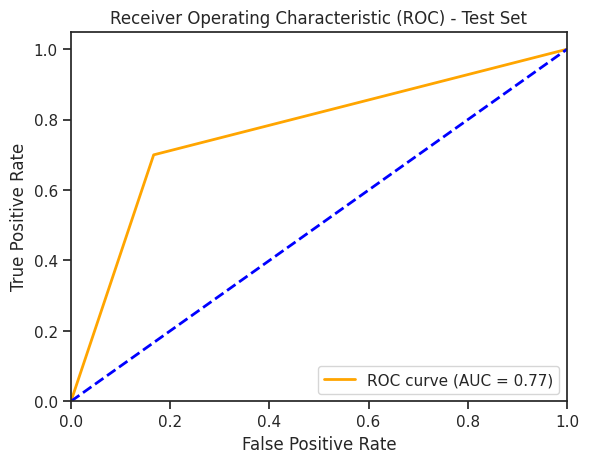

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

OCB + in CSF: 0.63530
Sex: 0.20930
Periventricular: 0.15539


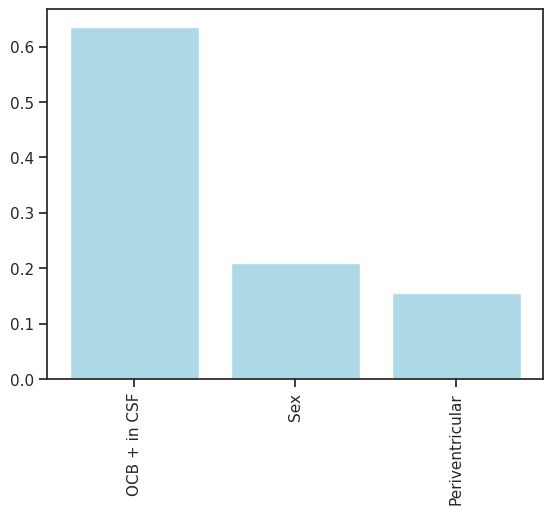

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()

#4. Using Only Predictors Identified in the Original Study

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Increased protein (g/l)', 'Pleocytosis (cells/ml)', 'Sum of symptoms'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                           int64
Age                                           int64
Fatigue                                       int64
General weakness                              int64
Pain                                          int64
Focal symptoms                                int64
Cranial Nerve Symptoms                        int64
CN3                                           int64
CN4                                           int64
CN5                                           int64
CN6                                           int64
CN8                                           int64
Pathological reflexes                         int64
Babinski's                                    int64
Rossolimo                                     int64
Muscle strength                               int64
Reflex asymmetry                              int64
Muscle tone abnormalities                     int64
Proprioception                              float64
Superficial 

Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[['Proprioception', 'MRI spinal lesions', 'OCB + in CSF', 'BAEP +']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(138, 4)
(138,)


Visualising Relationship between Target Variable and Each Feature in X

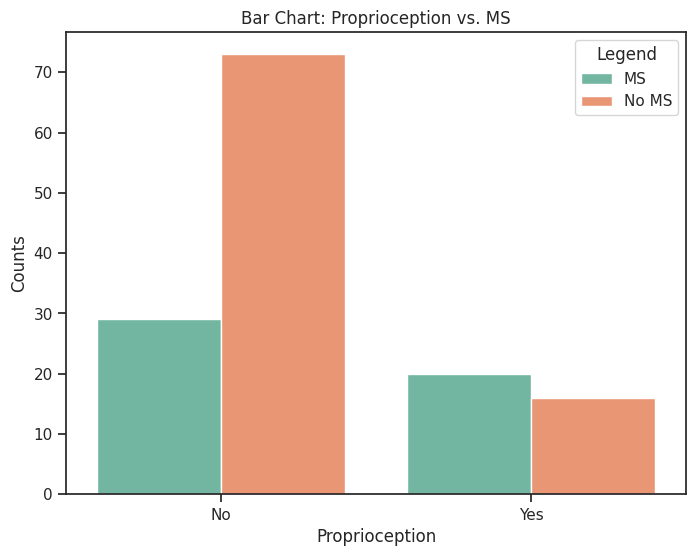

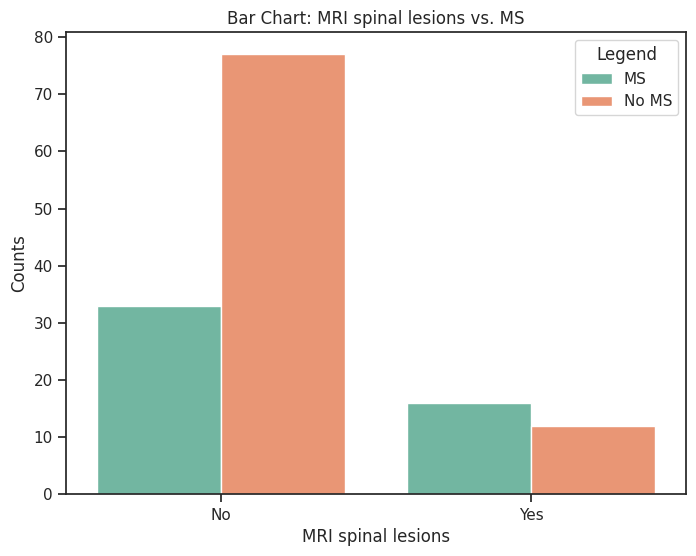

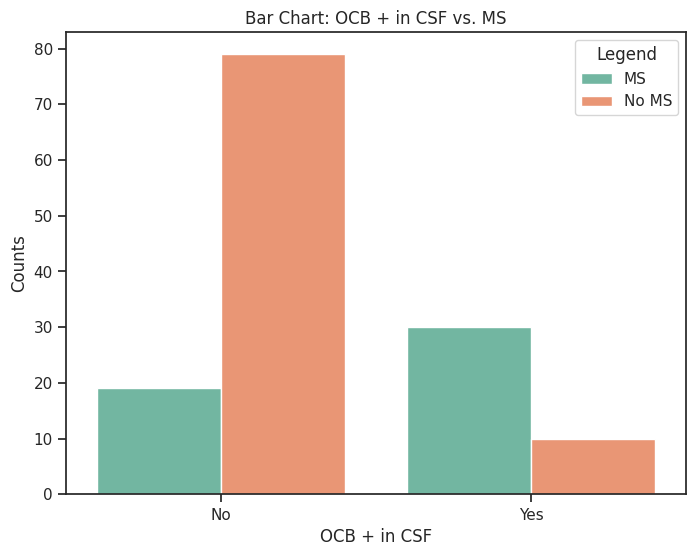

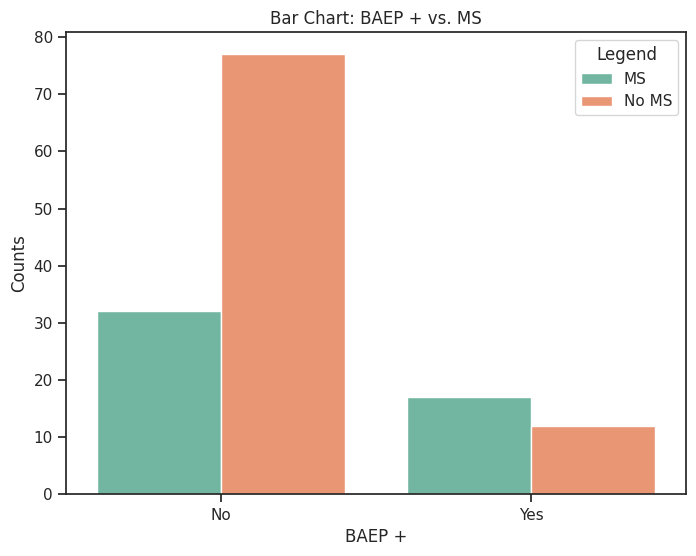

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define a function to convert values to "Yes" or "No"
def convert_to_label(value):
    if value == 1.0:
        return "Yes"
    else:
        return "No"

# Filter the data and convert the variables to binary values
filtered_df = imputed_df.copy()
filtered_df['Proprioception'] = filtered_df['Proprioception'].apply(convert_to_binary)
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Plot Bar chart for each variable
variables = ['Proprioception', 'MRI spinal lesions','OCB + in CSF', 'BAEP +']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=filtered_df, x=variable, hue='MS', hue_order=[1, 0], palette="Set2")
    ax.set_xlabel(variable)
    ax.set_ylabel("Counts")
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["MS", "No MS"])
    plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Checking for imbalanced classes in the dataset

In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (110, 4)
x_test: (28, 4)
y_train: (110,)
y_test: (28,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8967320261437909


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8529411764705882


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8627450980392158


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8405228758169934


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.8405228758169935


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.64771242 0.65947712 0.65882353 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.741656341320865
Standard Deviation of Train F1 Score: 0.028305508353743417
Average Validation F1 Score: 0.6804771698889345
Standard Deviation of Validation F1 Score: 0.14398999872183732


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89        71
         1.0       0.89      0.64      0.75        39

    accuracy                           0.85       110
   macro avg       0.86      0.80      0.82       110
weighted avg       0.85      0.85      0.84       110


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        18
         1.0       0.80      0.80      0.80        10

    accuracy                           0.86        28
   macro avg       0.84      0.84      0.84        28
weighted avg       0.86      0.86      0.86        28



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

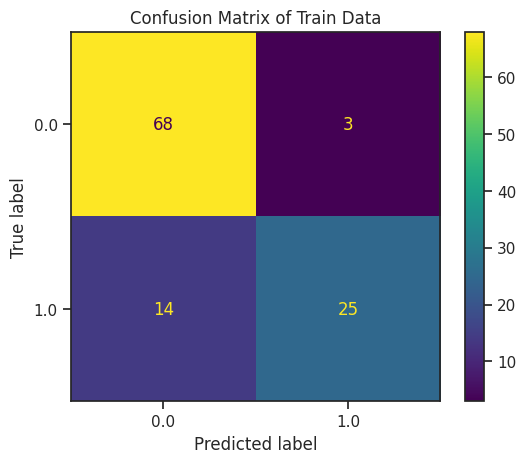

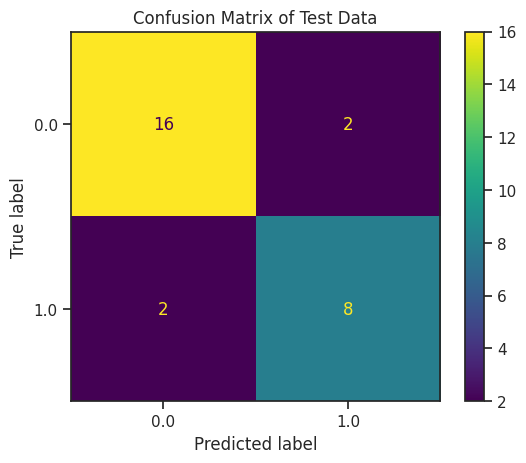

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

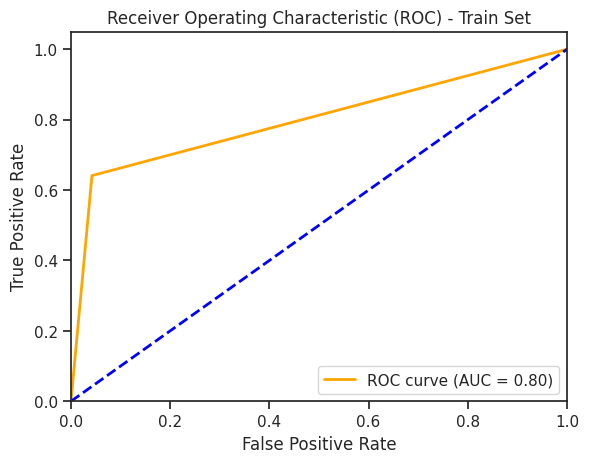

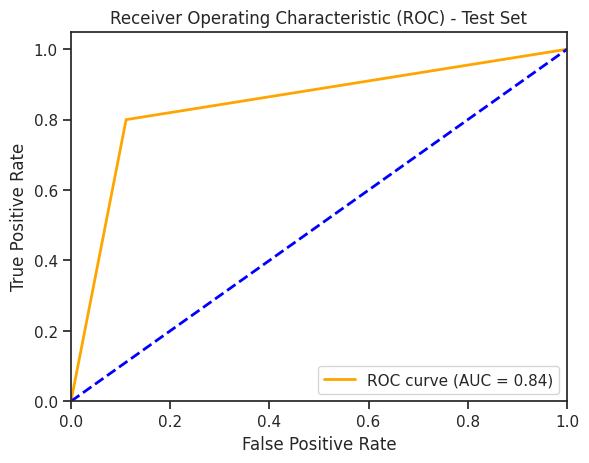

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Proprioception: 0.03819
MRI spinal lesions: 0.36003
OCB + in CSF: 0.54234
BAEP +: 0.05943


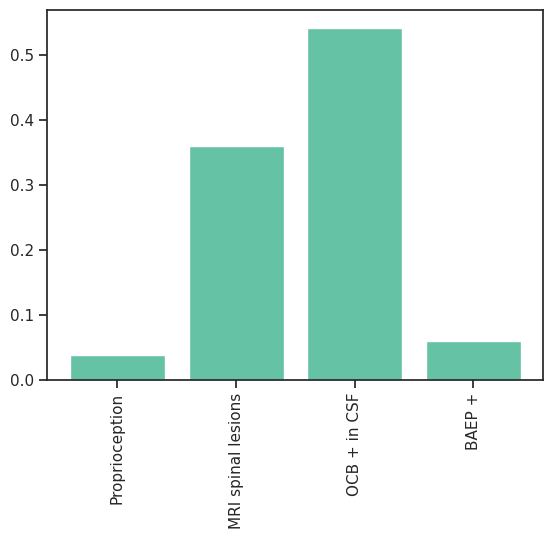

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


#5. Testing on Mexican Dataset

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

In [ ]:
# Visualise the test dataset
df_test.head(400)

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr', 'Fatigue',	'Age', 'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


In [ ]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr','VEP +', 'Periventricular', 'Age', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [ ]:
#Specify x and y in both datasets
x_train =imputed_df_train[['Sex',  'MRI spinal lesions', 'BAEP +', 'OCB + in CSF']]  # Features in Dataset 1
y_train =imputed_df_train['MS']  # Target variable in Dataset 1

x_test = imputed_df_test[['Sex', 'MRI spinal lesions', 'BAEP +', 'OCB + in CSF']]  # Features in Dataset 2
y_test = imputed_df_test['MS']  # Target variable in Dataset 2


#Print train dimensions
print(x_train.shape)
print(y_train.shape)

#Print test dimensions
print(x_test.shape)
print(y_test.shape)

(138, 4)
(138,)
(272, 4)
(272,)


Visualising Relationship between Target Variable and Each Feature in x

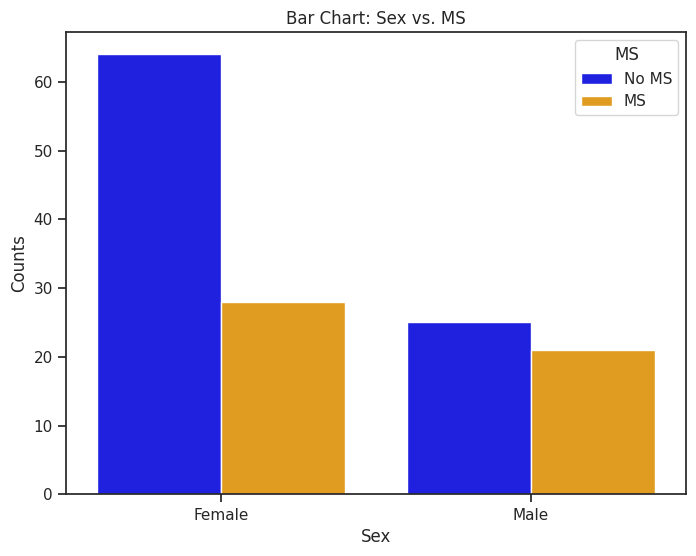

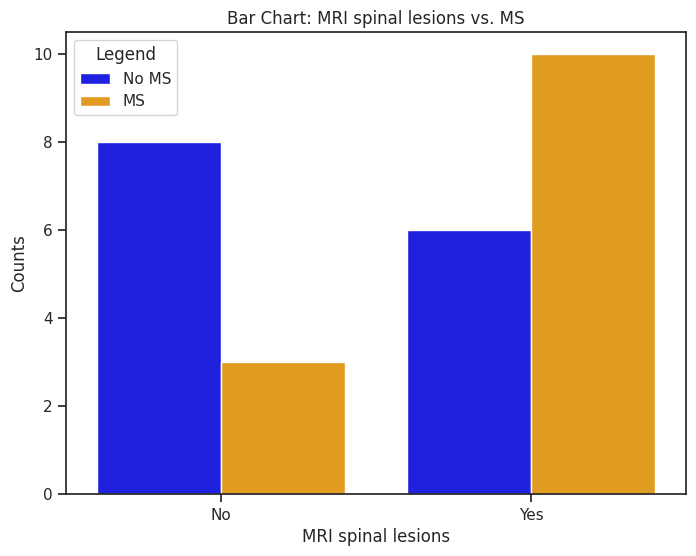

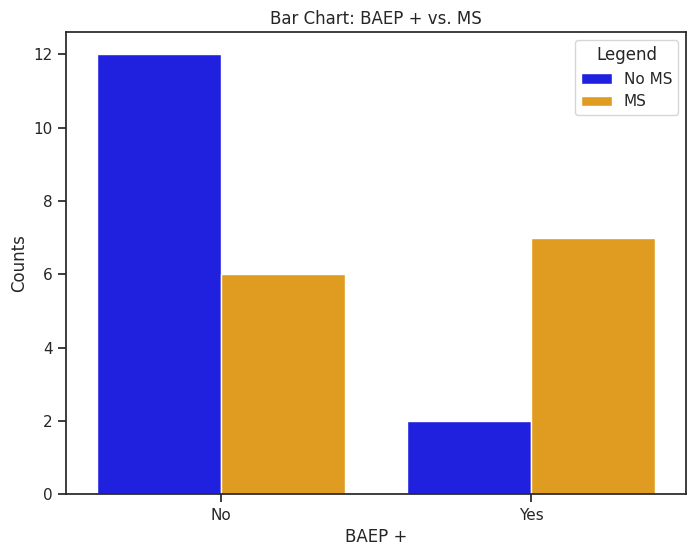

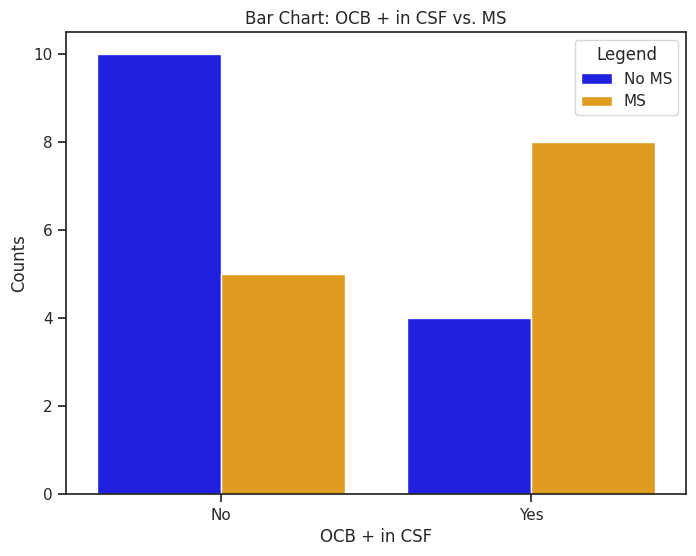

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"blue", "orange"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["blue", "orange"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()




Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


,Sex,BAEP +,MRI spinal lesions,OCB + in CSF,MS
Sex,1.000000,0.060780,0.141574,-0.109466,0.149906
BAEP +,0.060780,1.000000,-0.065796,0.359631,0.354526
MRI spinal lesions,0.141574,-0.065796,1.000000,0.716623,0.597938
OCB + in CSF,-0.109466,0.359631,0.716623,1.000000,0.586713
MS,0.149906,0.354526,0.597938,0.586713,1.000000


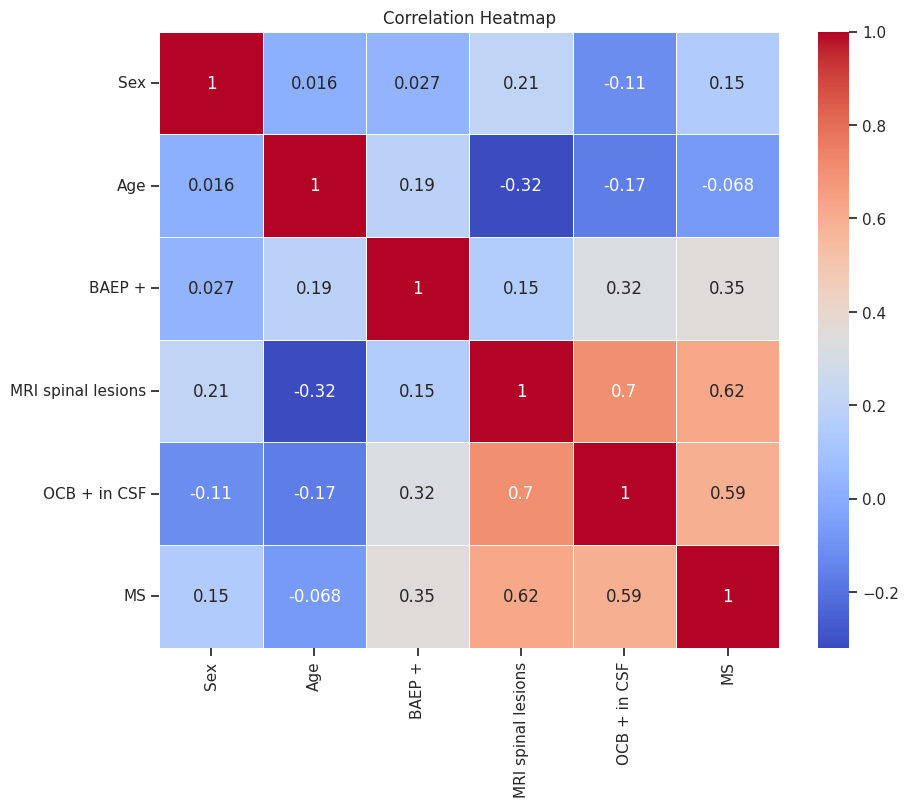

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


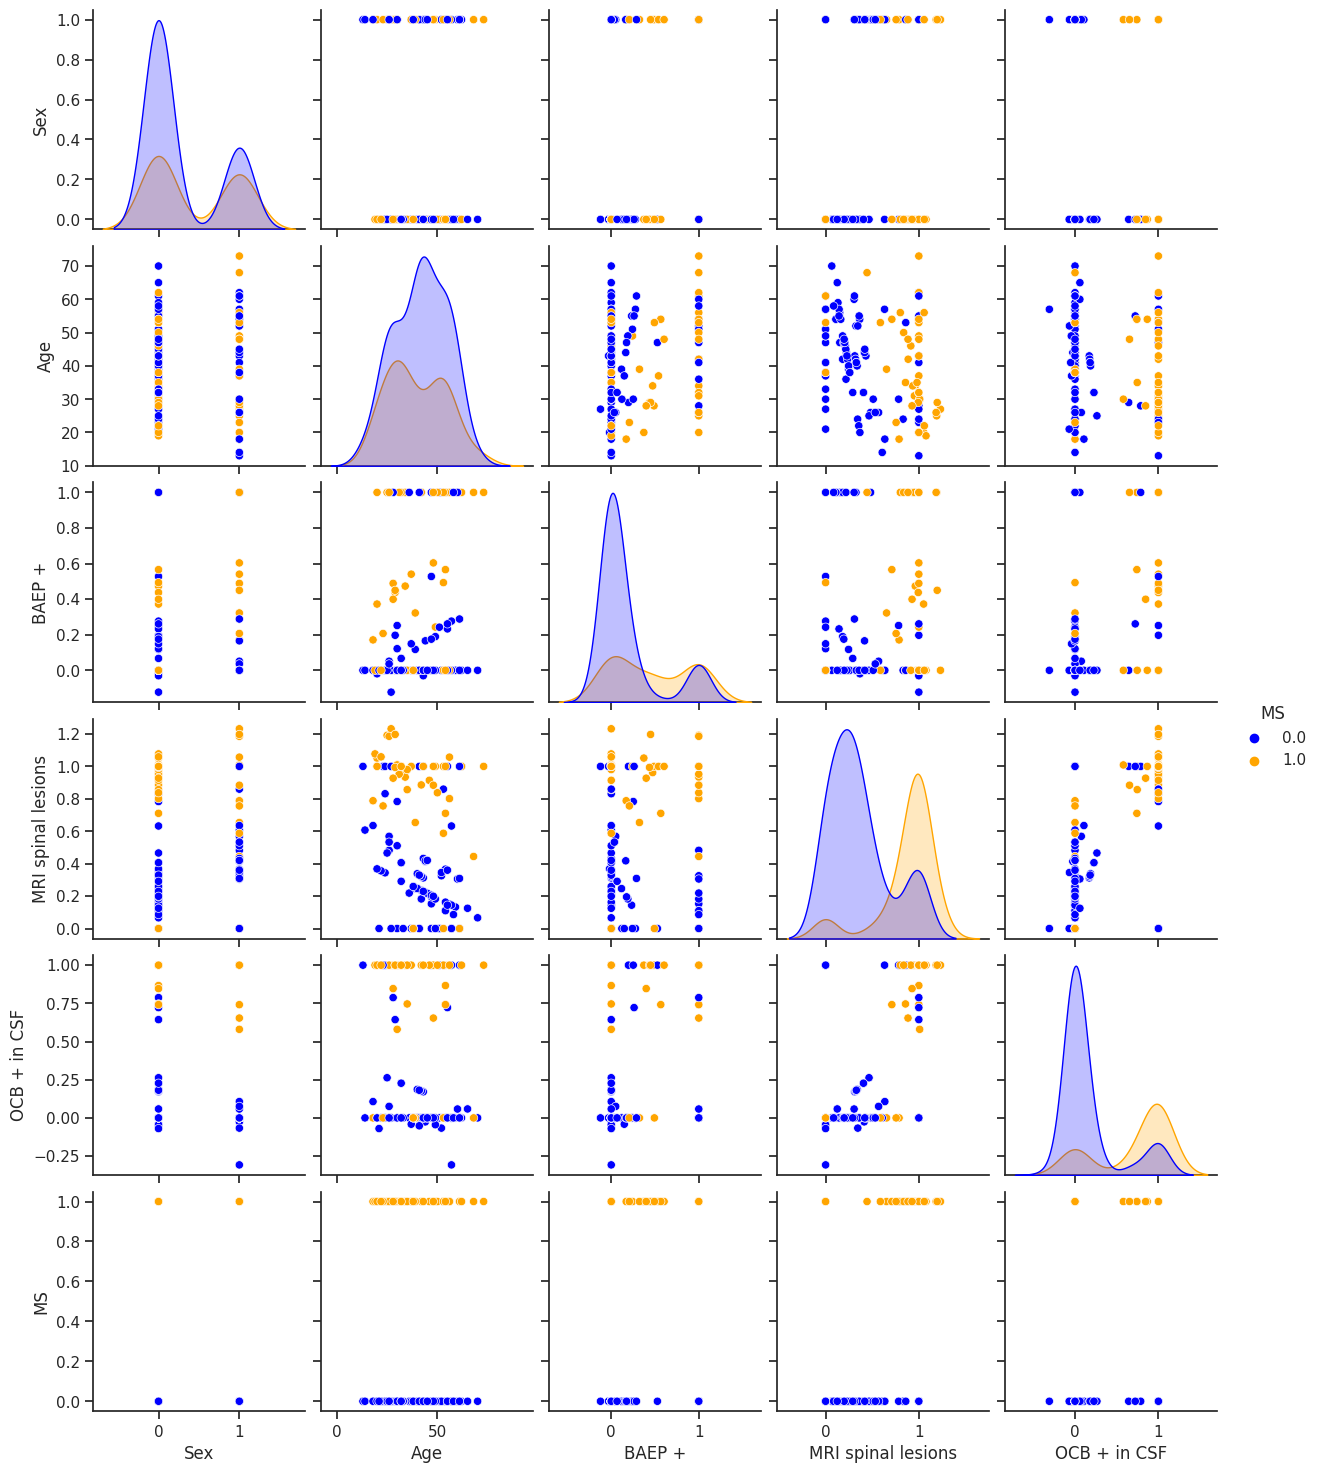

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


Features with multicollinearity (absolute correlation coefficient > 0.7):
MRI spinal lesions - OCB + in CSF


Checking for imbalanced classes in the dataset

0.0    64.492754
1.0    35.507246
Name: MS, dtype: float64


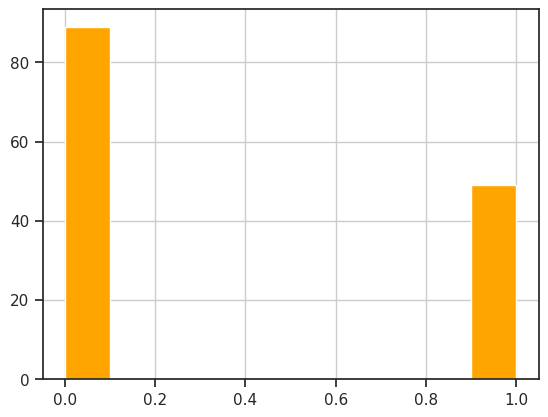

The baseline accuracy is: 0.644927536231884


In [ ]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8818181818181818


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.9181818181818182


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.9090909090909092


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.8913043478260871


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.9181818181818182


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.89090909 0.8458498  0.89090909 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.8905203707118577
Standard Deviation of Train F1 Score: 0.05505378872359811
Average Validation F1 Score: 0.7231884057971014
Standard Deviation of Validation F1 Score: 0.07680950145871474


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        89
         1.0       1.00      0.82      0.90        49

    accuracy                           0.93       138
   macro avg       0.95      0.91      0.93       138
weighted avg       0.94      0.93      0.93       138


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.55      0.99      0.70       148
         1.0       0.60      0.02      0.05       124

    accuracy                           0.55       272
   macro avg       0.57      0.51      0.38       272
weighted avg       0.57      0.55      0.40       272



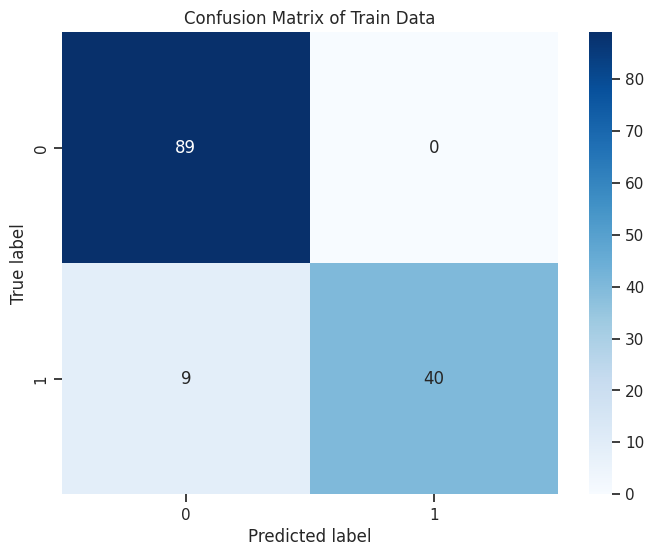

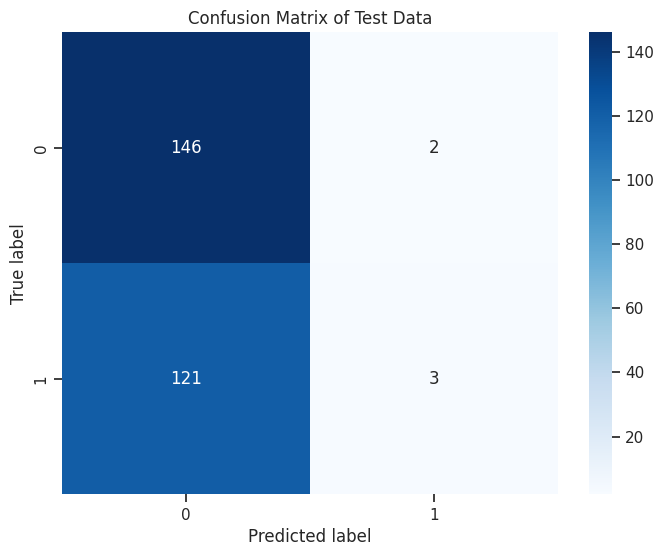

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(y_train, y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



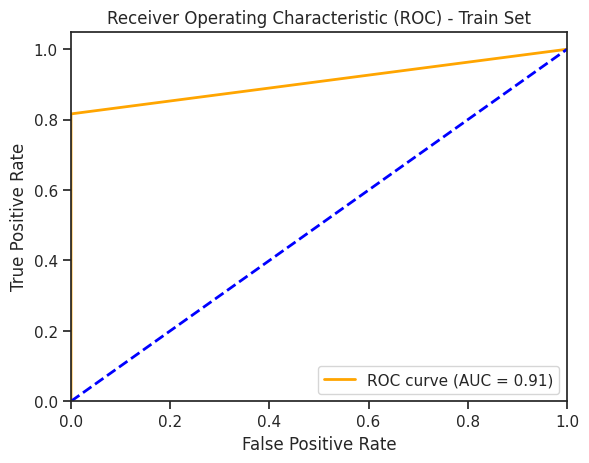

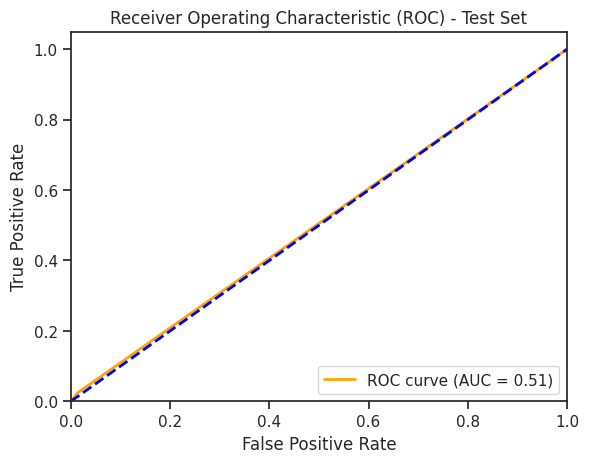

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Sex: 0.01716
MRI spinal lesions: 0.20533
BAEP +: 0.34679
OCB + in CSF: 0.43073


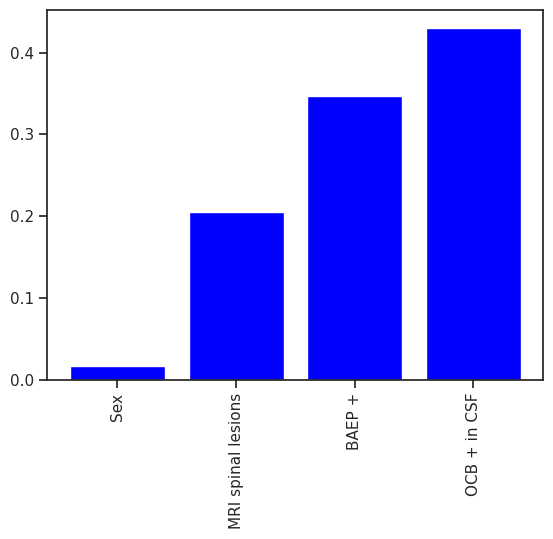

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()

#6. Testing on Lithuanian Dataset

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

In [ ]:
# Visualise the test dataset
df_test.head(400)

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

The train dataset dimensions are: 
(272, 10)
The test dataset dimensions are: 
(138, 44)


In [ ]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr','VEP +', 'Age',  'Periventricular', 'MRI infratentorial lesions'], axis=1)

In [ ]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr', 'Fatigue', 'Age',	'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [ ]:
#Specify x and y in both datasets
x_train =imputed_df_train[['Sex', 'MRI spinal lesions', 'BAEP +', 'OCB + in CSF']]  # Features in Dataset 1
y_train =imputed_df_train['MS']  # Target variable in Dataset 1

x_test = imputed_df_test[['Sex', 'MRI spinal lesions', 'BAEP +', 'OCB + in CSF']]  # Features in Dataset 2
y_test = imputed_df_test['MS']  # Target variable in Dataset 2


#Print train dimensions
print(x_train.shape)
print(y_train.shape)

#Print test dimensions
print(x_test.shape)
print(y_test.shape)

(272, 4)
(272,)
(138, 4)
(138,)


Visualising Relationship between Target Variable and Each Feature in x

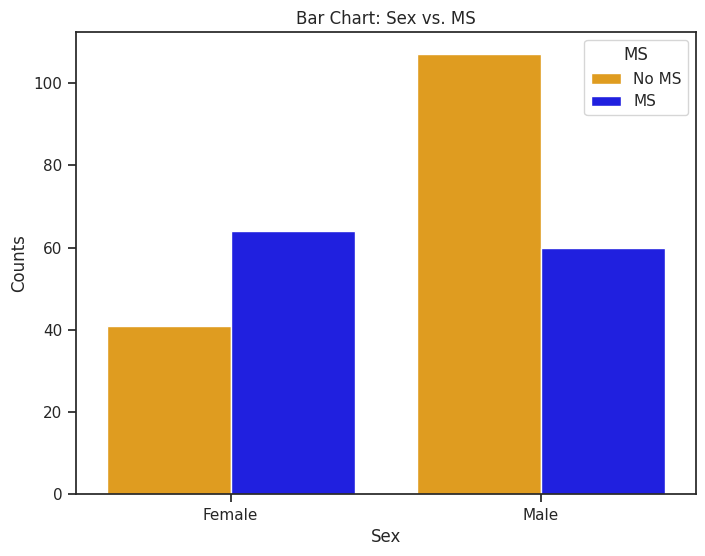

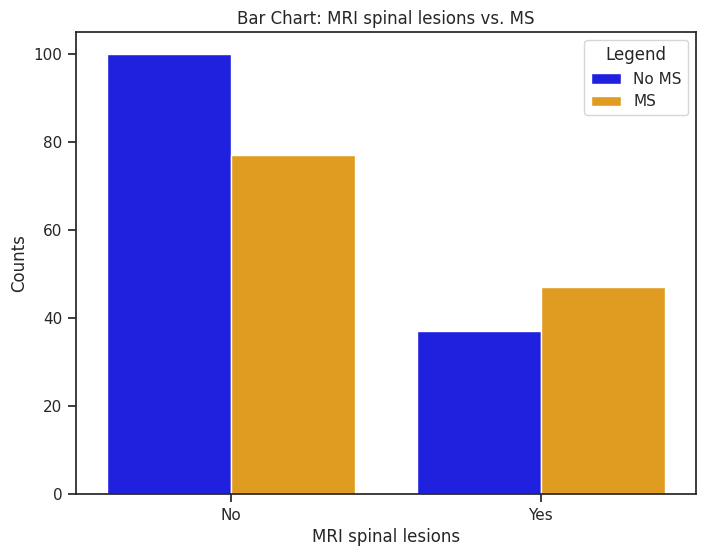

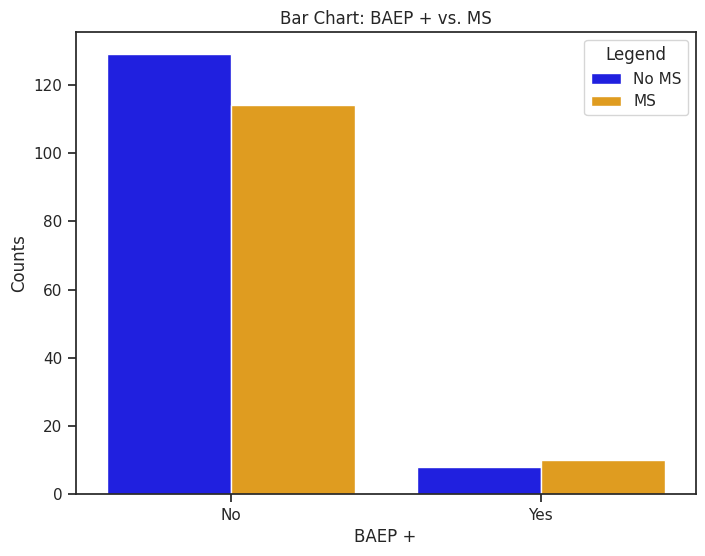

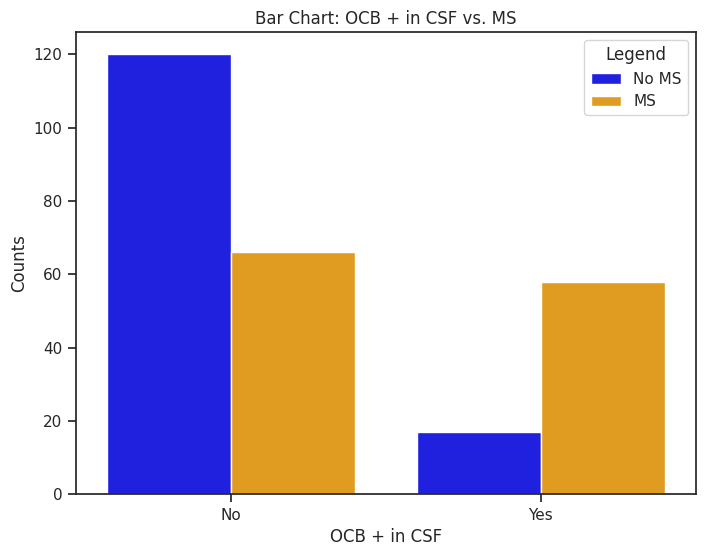

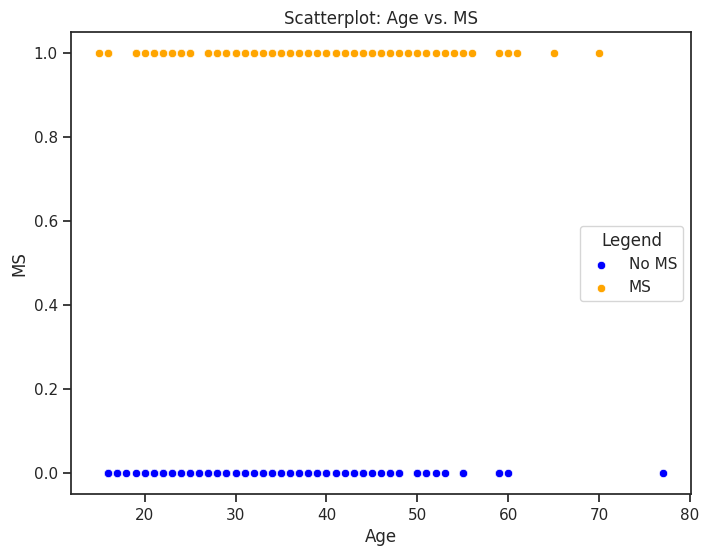

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"blue", "orange"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["blue", "orange"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()


Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


,Sex,BAEP +,MRI spinal lesions,OCB + in CSF,MS
Sex,1.000000,0.153455,-0.003224,0.176835,0.244609
BAEP +,0.153455,1.000000,0.073435,0.164702,0.053275
MRI spinal lesions,-0.003224,0.073435,1.000000,0.148240,0.123734
OCB + in CSF,0.176835,0.164702,0.148240,1.000000,0.385584
MS,0.244609,0.053275,0.123734,0.385584,1.000000


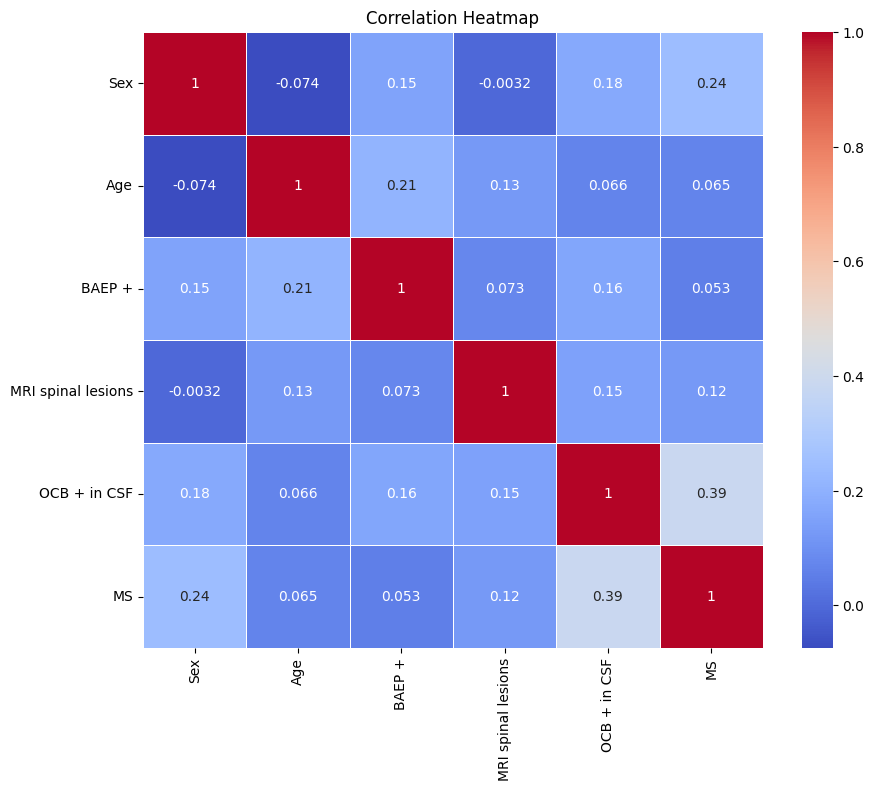

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


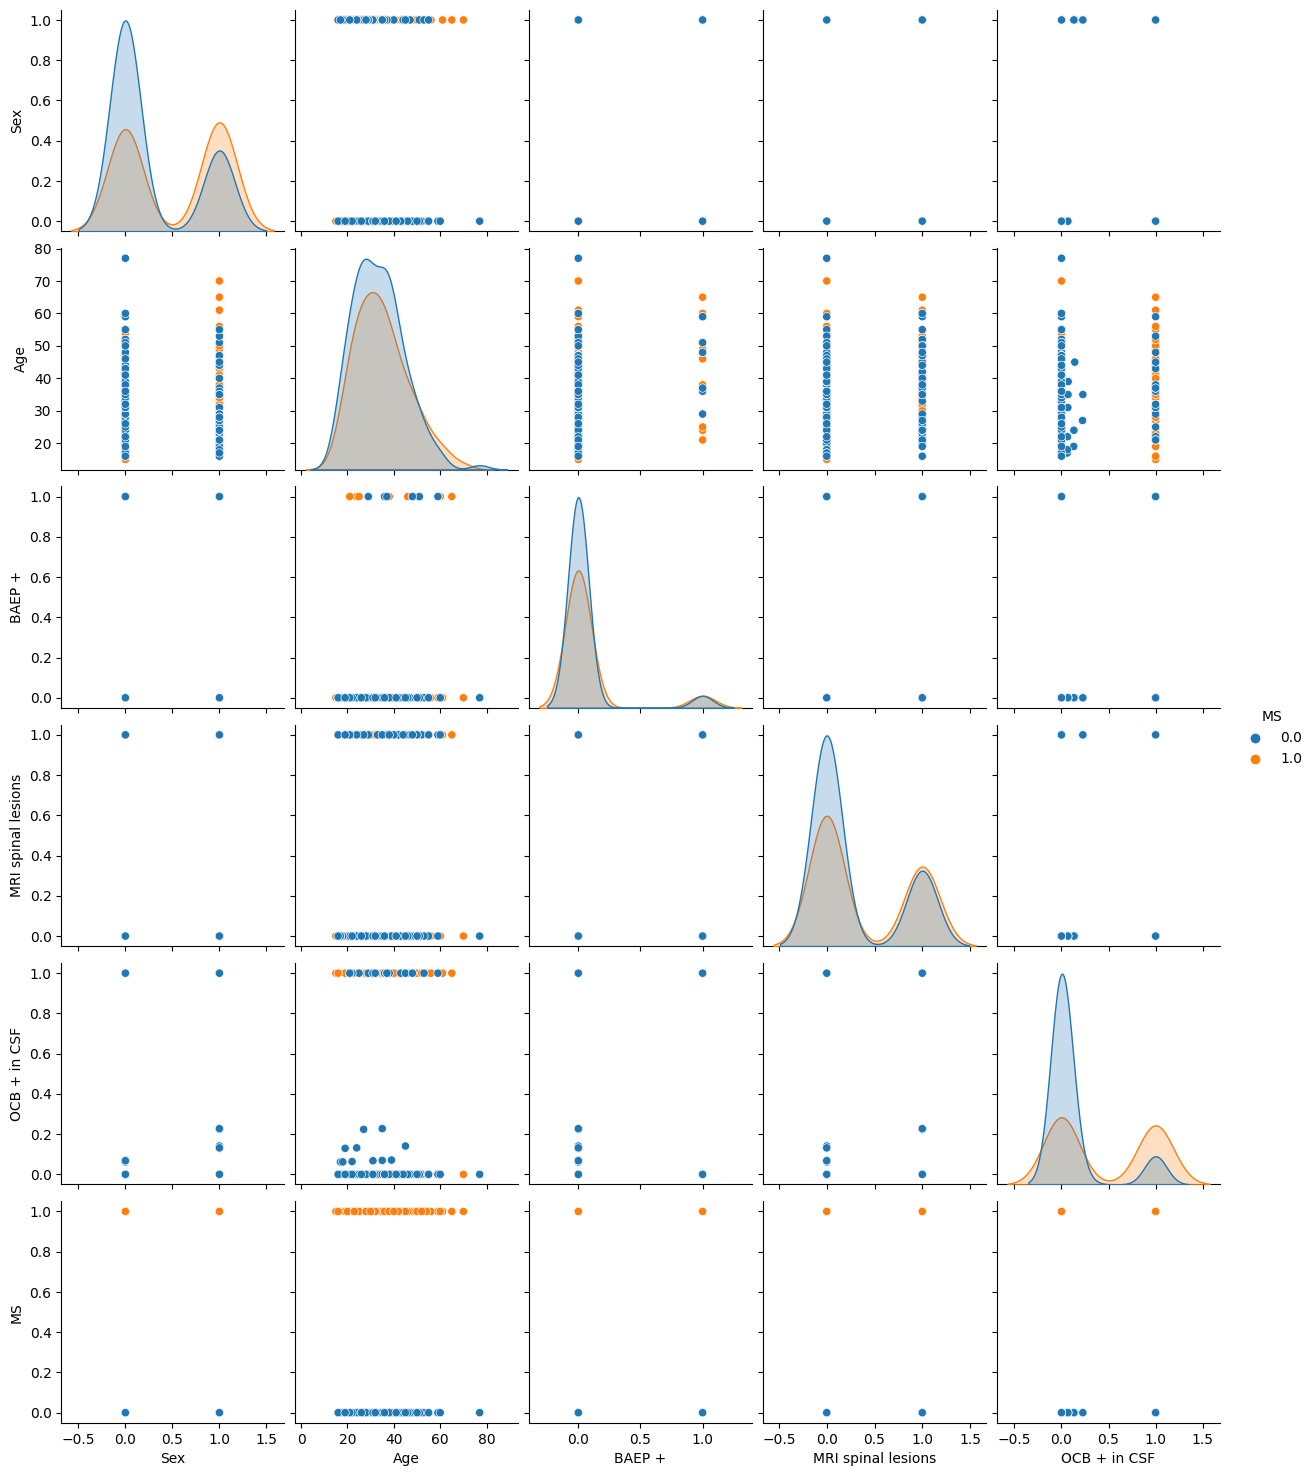

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


Checking for imbalanced classes in the dataset

In [ ]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.7094080338266384


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.7466173361522199


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
F1 Score: 0.7064482029598309


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.720507399577167


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.71553911205074


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.71099366 0.71099366 0.71099366 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.6187924186067869
Standard Deviation of Train F1 Score: 0.0421012564536237
Average Validation F1 Score: 0.6020177400837837
Standard Deviation of Validation F1 Score: 0.07209114511993503


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       148
         1.0       0.77      0.54      0.64       124

    accuracy                           0.72       272
   macro avg       0.73      0.70      0.70       272
weighted avg       0.73      0.72      0.71       272


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        89
         1.0       0.69      0.59      0.64        49

    accuracy                           0.76       138
   macro avg       0.74      0.72      0.73       138
weighted avg       0.76      0.76      0.76       138



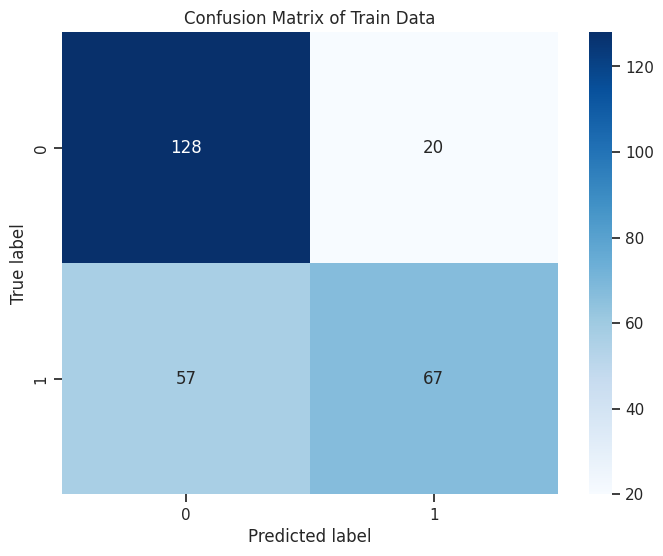

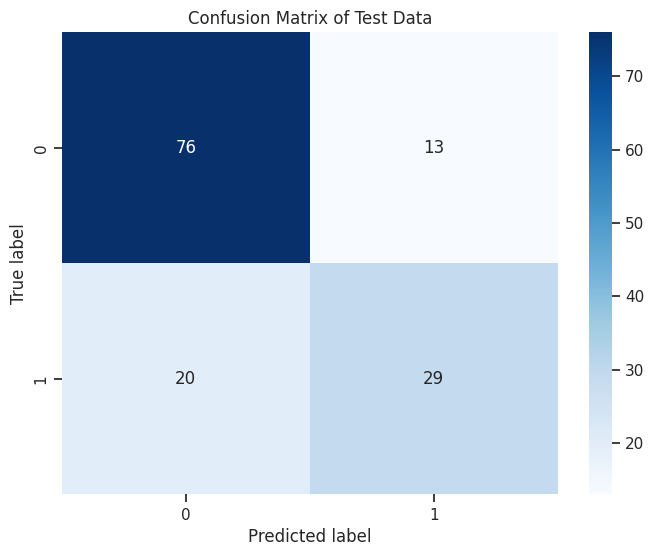

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



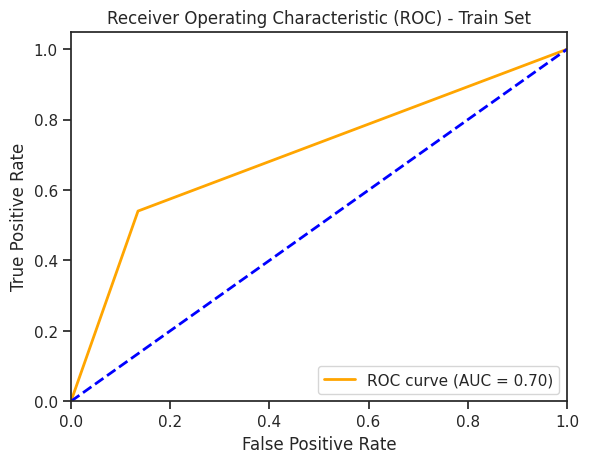

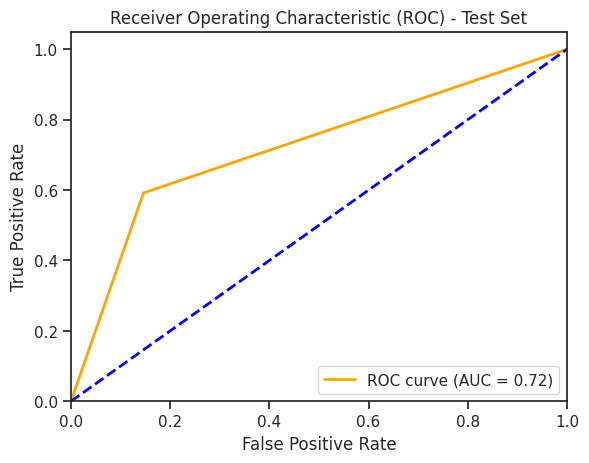

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Sex: 0.24918
MRI spinal lesions: 0.03553
BAEP +: 0.04731
OCB + in CSF: 0.66798


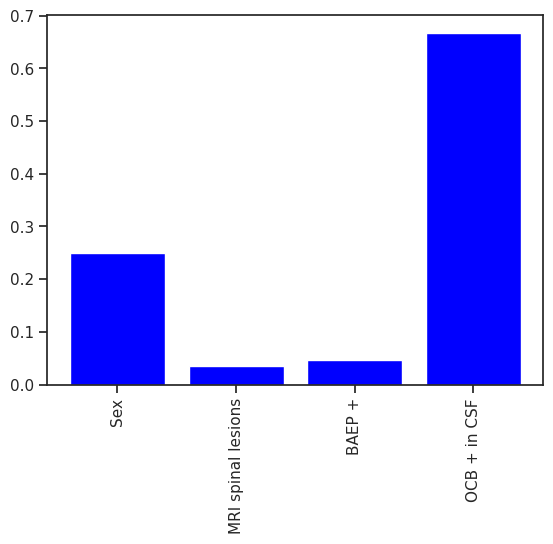

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


#7. Using Concatenated Dataset (Mexican+Lithuanian Combined)

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Concatenated Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Periventricular', 'Age', 'VEP +', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                     int64
OCB + in CSF          float64
BAEP +                float64
MRI spinal lesions    float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[[ 'MRI spinal lesions', 'OCB + in CSF', 'BAEP +', 'Sex']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(410, 4)
(410,)


Visualising Relationship between Target Variable and Each Feature in X

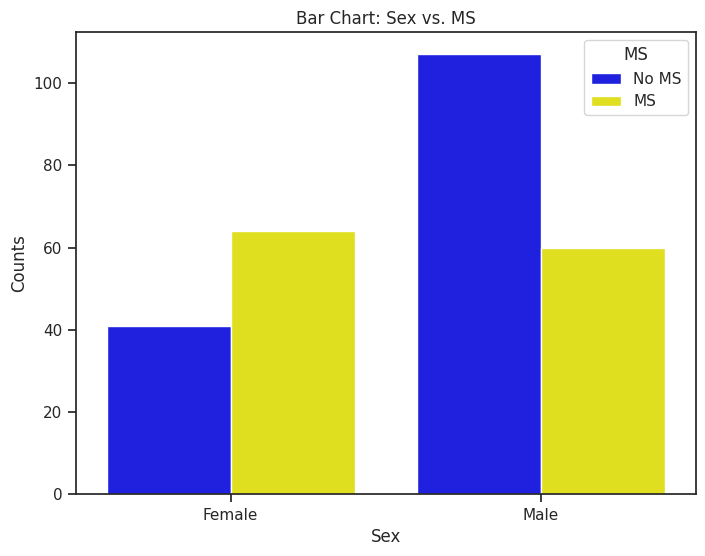

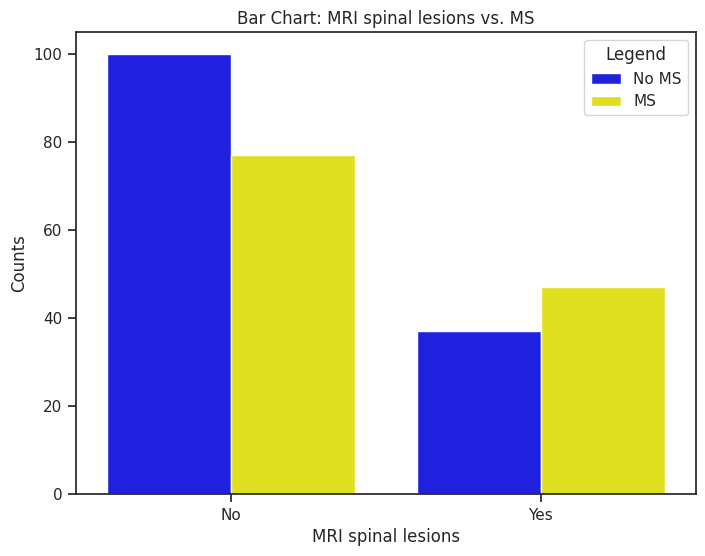

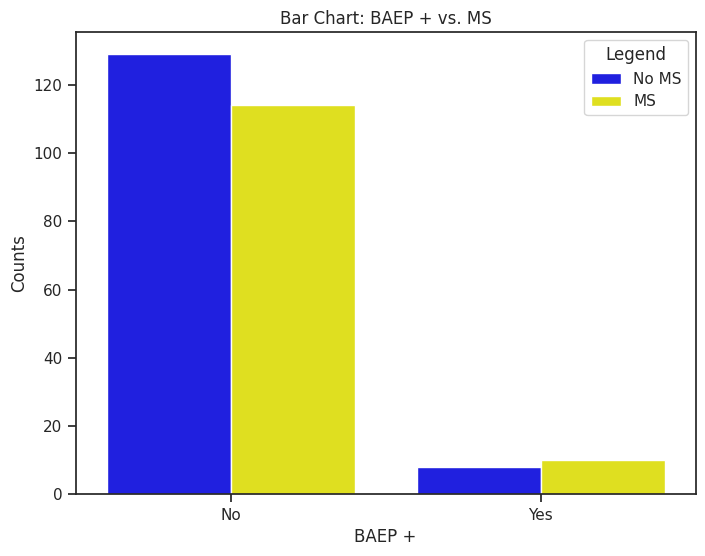

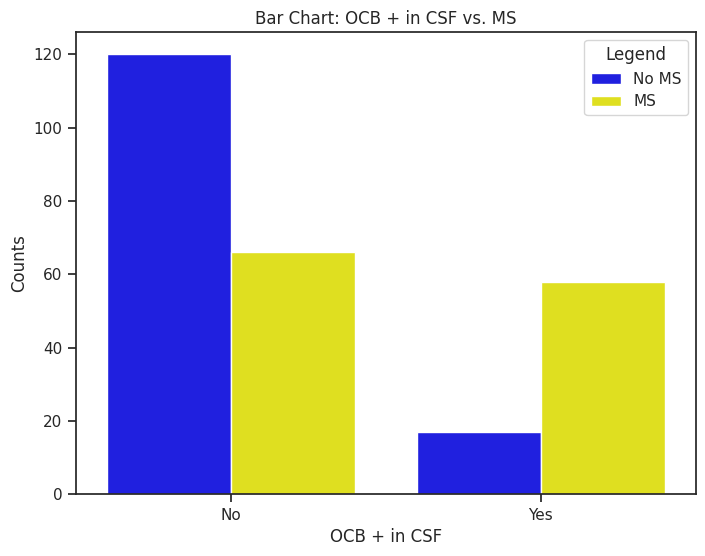

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette=["blue", "yellow"])

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["blue", "yellow"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df, palette=["blue", "yellow"])
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()



Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


,MRI spinal lesions,OCB + in CSF,BAEP +,Sex,MS
MRI spinal lesions,1.000000,0.114599,0.051671,0.010913,0.075824
OCB + in CSF,0.114599,1.000000,0.230081,0.089504,0.444444
BAEP +,0.051671,0.230081,1.000000,0.078308,0.120500
Sex,0.010913,0.089504,0.078308,1.000000,0.217936
MS,0.075824,0.444444,0.120500,0.217936,1.000000


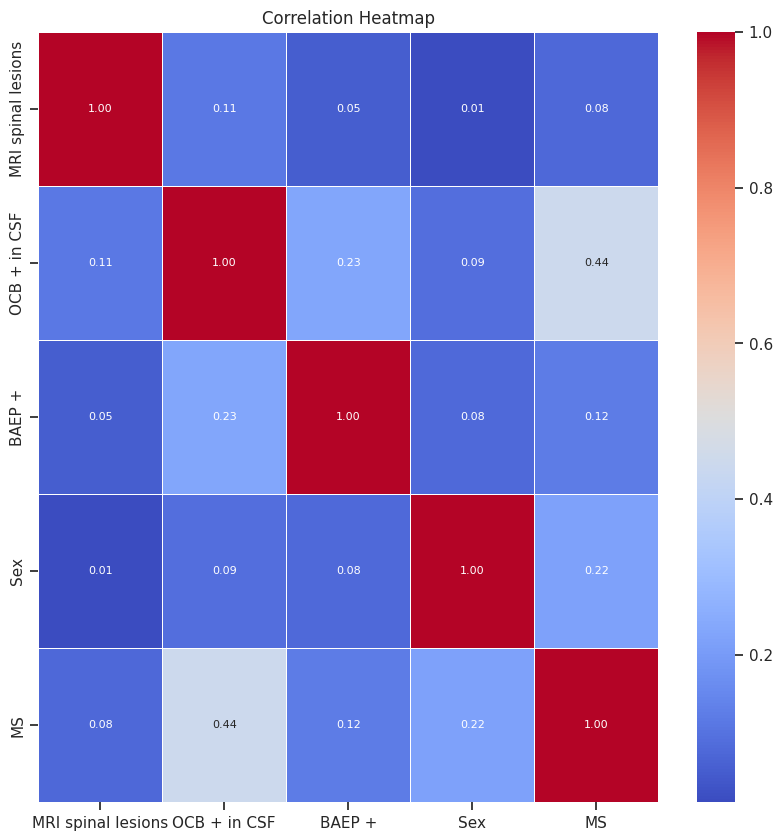

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

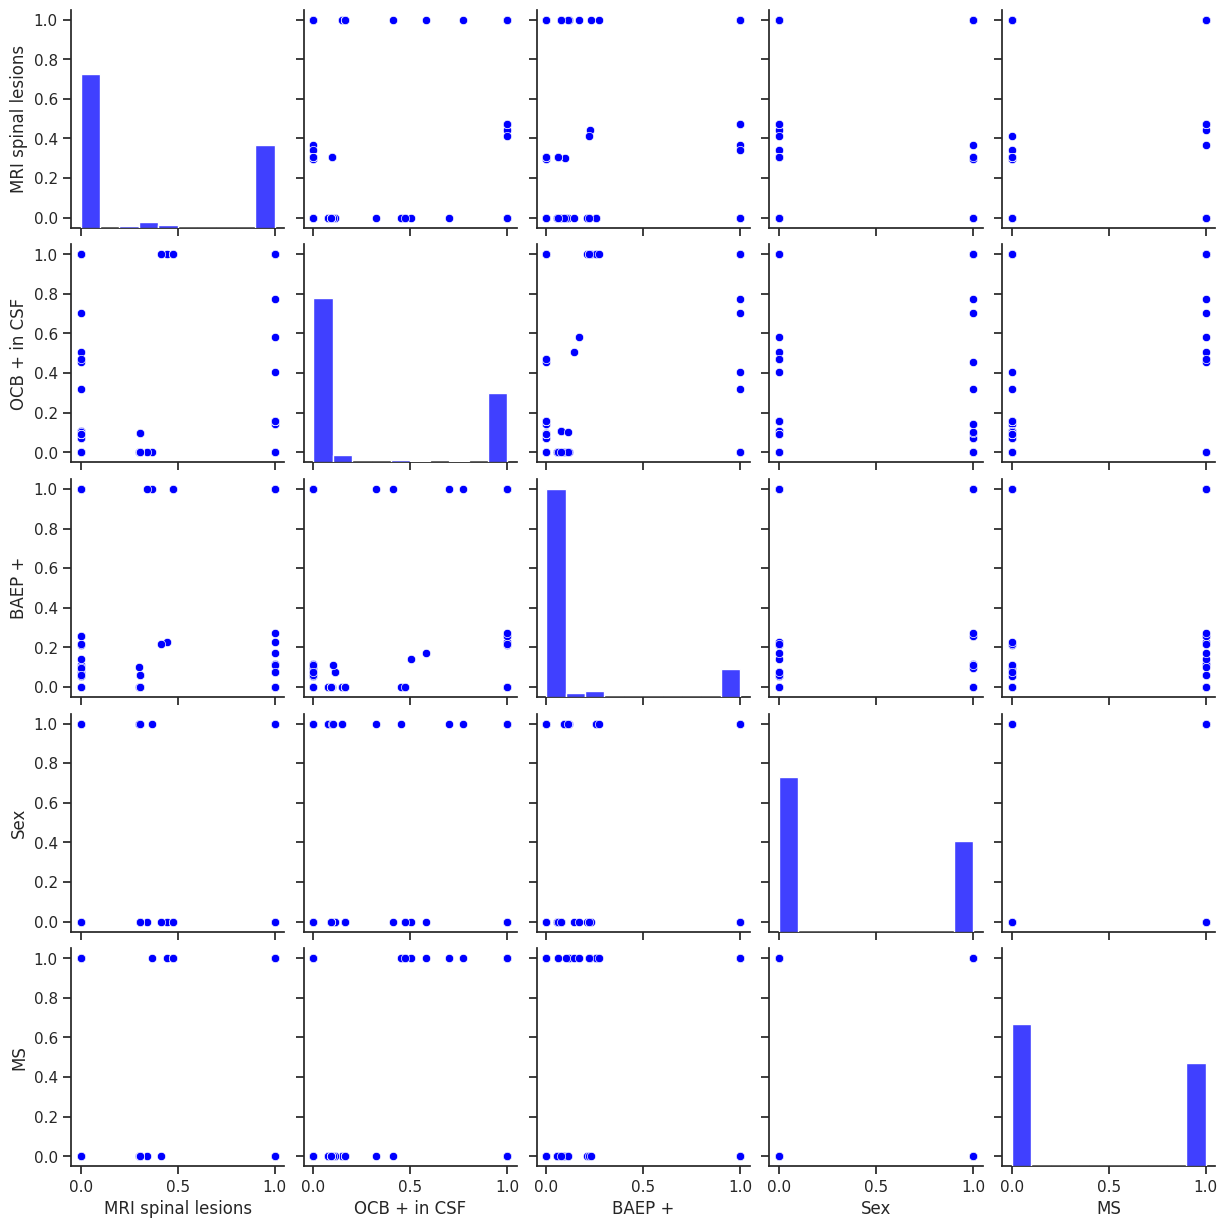

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    57.804878
1.0    42.195122
Name: MS, dtype: float64


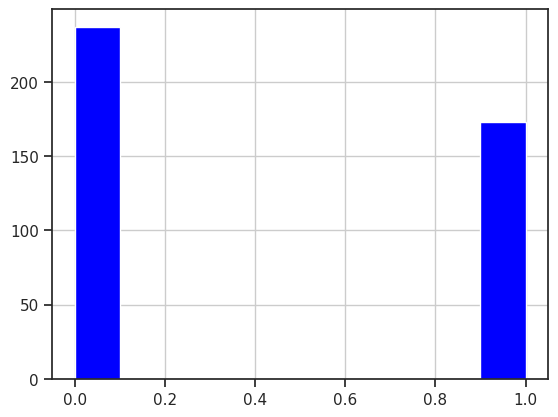

The baseline accuracy is: 0.5780487804878048


In [ ]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualize dataset imbalance
import matplotlib.pyplot as plt
y.hist(color=['blue'])
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)


##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (328, 4)
x_test: (82, 4)
y_train: (328,)
y_test: (82,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {'class1': 0.5, 'class2': 0.5}],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None, 42]
}

##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
dt_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in dt_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=1)

    # Create an instance of GridSearchCV for Decision Tree Classifier
    dt_cv = GridSearchCV(dt, dt_param_grid, cv=dt_skfold)

    # Fit GridSearchCV on the training fold
    dt_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_dt_model = dt_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", dt_cv.best_params_)
    print("F1 Score:", dt_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_dt_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_dt_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.2, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.7517416545718433


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
F1 Score: 0.7556603773584906


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.7857764876632801


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.7603047895500726


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
64800 fits failed out of a total of 194400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
F1 Score: 0.7370101596516692


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.69172714 0.6841074  0.69172714 ...        nan        nan        nan]
  warnings.warn(


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.6495494772220816
Standard Deviation of Train F1 Score: 0.043566834287155
Average Validation F1 Score: 0.6279807232461465
Standard Deviation of Validation F1 Score: 0.05698368423837923


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = dt_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = dt_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))



Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       190
         1.0       0.63      0.59      0.61       138

    accuracy                           0.68       328
   macro avg       0.67      0.67      0.67       328
weighted avg       0.68      0.68      0.68       328


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63        47
         1.0       0.48      0.43      0.45        35

    accuracy                           0.56        82
   macro avg       0.55      0.54      0.54        82
weighted avg       0.55      0.56      0.56        82



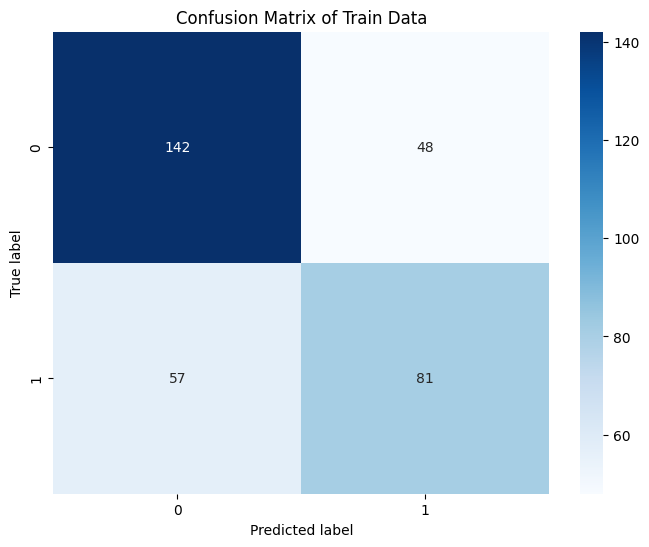

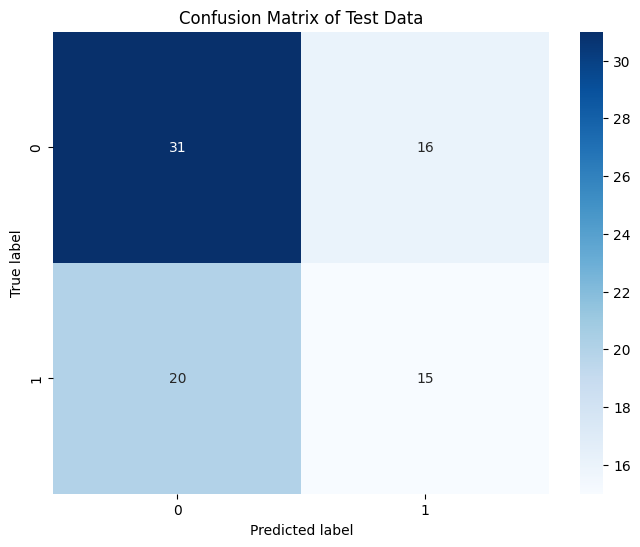

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(y_train, y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


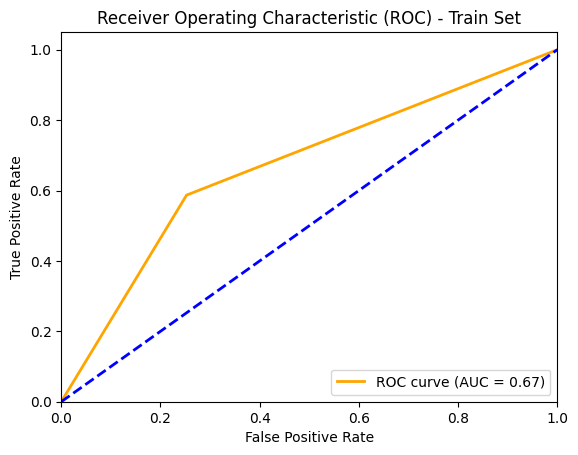

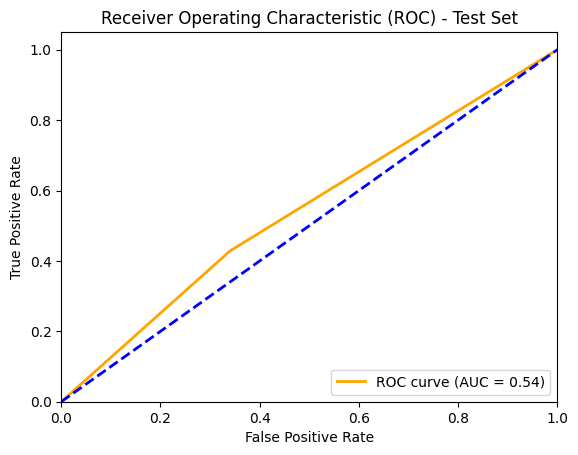

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculating Feature Importances

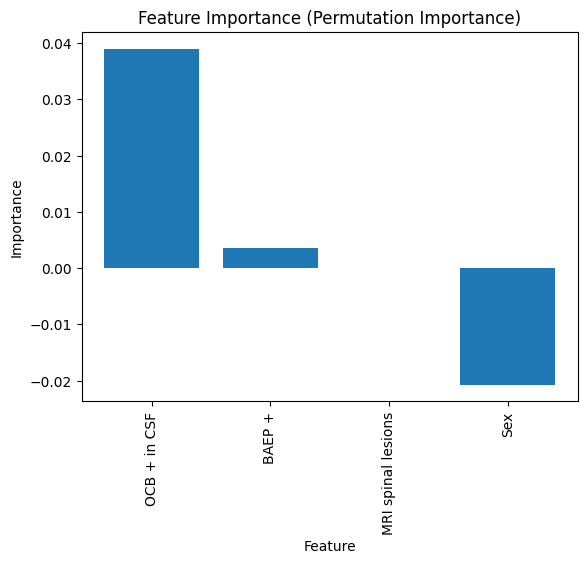

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute feature importance using permutation importance
perm_importance = permutation_importance(best_model, x_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = list(x_train.columns)

# Calculate mean importance scores
mean_importance = perm_importance.importances_mean

# Sort features by importance
sorted_indices = np.argsort(mean_importance)[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_mean_importance = mean_importance[sorted_indices]

# Plot feature importances
plt.bar(sorted_feature_names, sorted_mean_importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

